In [2]:
# Подключение необходимых библиотек
import random
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import quad
from scipy import integrate
from numpy import inf, exp
from numpy.polynomial import Polynomial

In [29]:
# Параметры образца 

# Материал PbS
Tpr = 300                               # К  - Температура фоторезистора
d = 1.5e-6                              # см - Толщина фоторезистора 
t = 300e-6                              # сек - время жизни носителей заряда 
A = 1                                   # см^2 - Эффективная площадь
Su = 1e5                                # см/с - Скорость поверхностной рекомбинации на освещаемой поверхности
Sd = 1e10                               # см/с - Скорость поверхностной рекомбинации на тыльной стороне поверхности
Tbb = 600                               # К - Температура абсолютно черного тела
q = 1.6e-19                             # Кл - Элементарный заряд 
ni = 2e15                               # см^-3 - Собственная концентрация 
un = 510                                # см^2/В*с - Подвижность электронов
up = 520                                # см^2/В*с - Подвижность дырок 
V0 = np.arange(-10, 10, 0.1)            # В - Подаваемое напряжение
c = 3e8                                 # м/с - Скорость света
h = 6.6e-34                             # Дж*с - Постоиная Планка
lambd = np.arange(1e-6, 15e-6, 1e-8)    # массив длин волн
k = 1.3e-23                             # Дж/К - Постоянная Больцмана
n = 7.37                                # Коэффициент преломления
m = 0.4*9e-31                           # эффективная масса
ep = 8.8e-12                            # электрическая постоянная 
Eg = 0.37                               # Ширина запрещенной зоны
exp = 2.72                              # экспонента


1.2 Рассчитать темновое сопротивление ФР, построить ВАХ в диапазоне напряжений от −10В до + 10В; 

2022653.7216828482


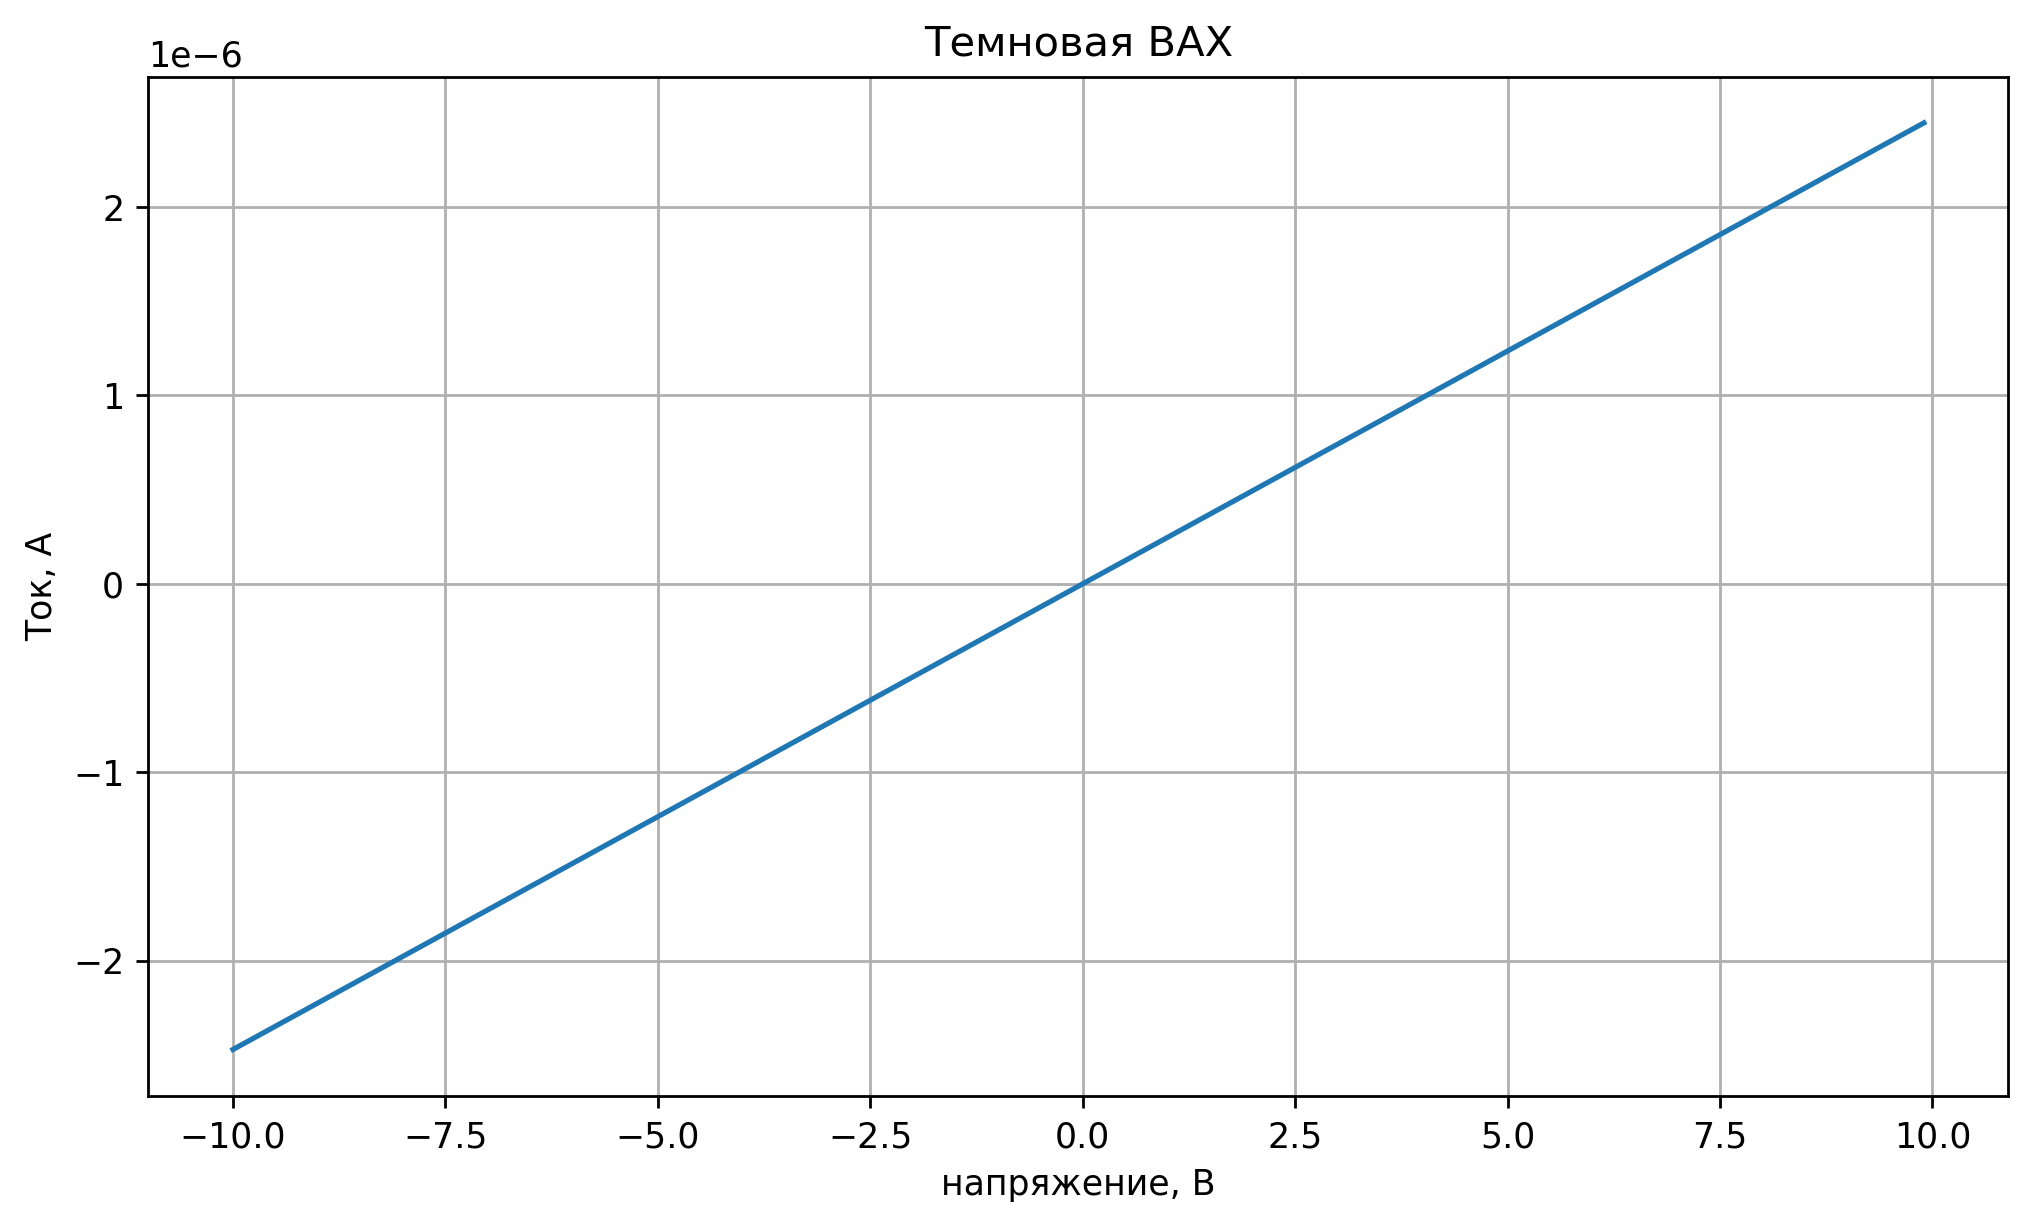

In [31]:

Rt=(1/(q*ni*(un+up)))*(1/d)
Ipht = np.zeros(200)
for i in range(0, 200):
    Ipht[i] = V0[i]/(2*Rt);
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("напряжение, В") 
ax.set_ylabel("Ток, А") 
ax.set_title('Темновая ВАХ')
ax.plot(V0, Ipht,);




Темновое сопротивление составило 2 МОм

1.3 Построить распределение потока энергии и потока фотонов АЧТ при заданной температуре; 

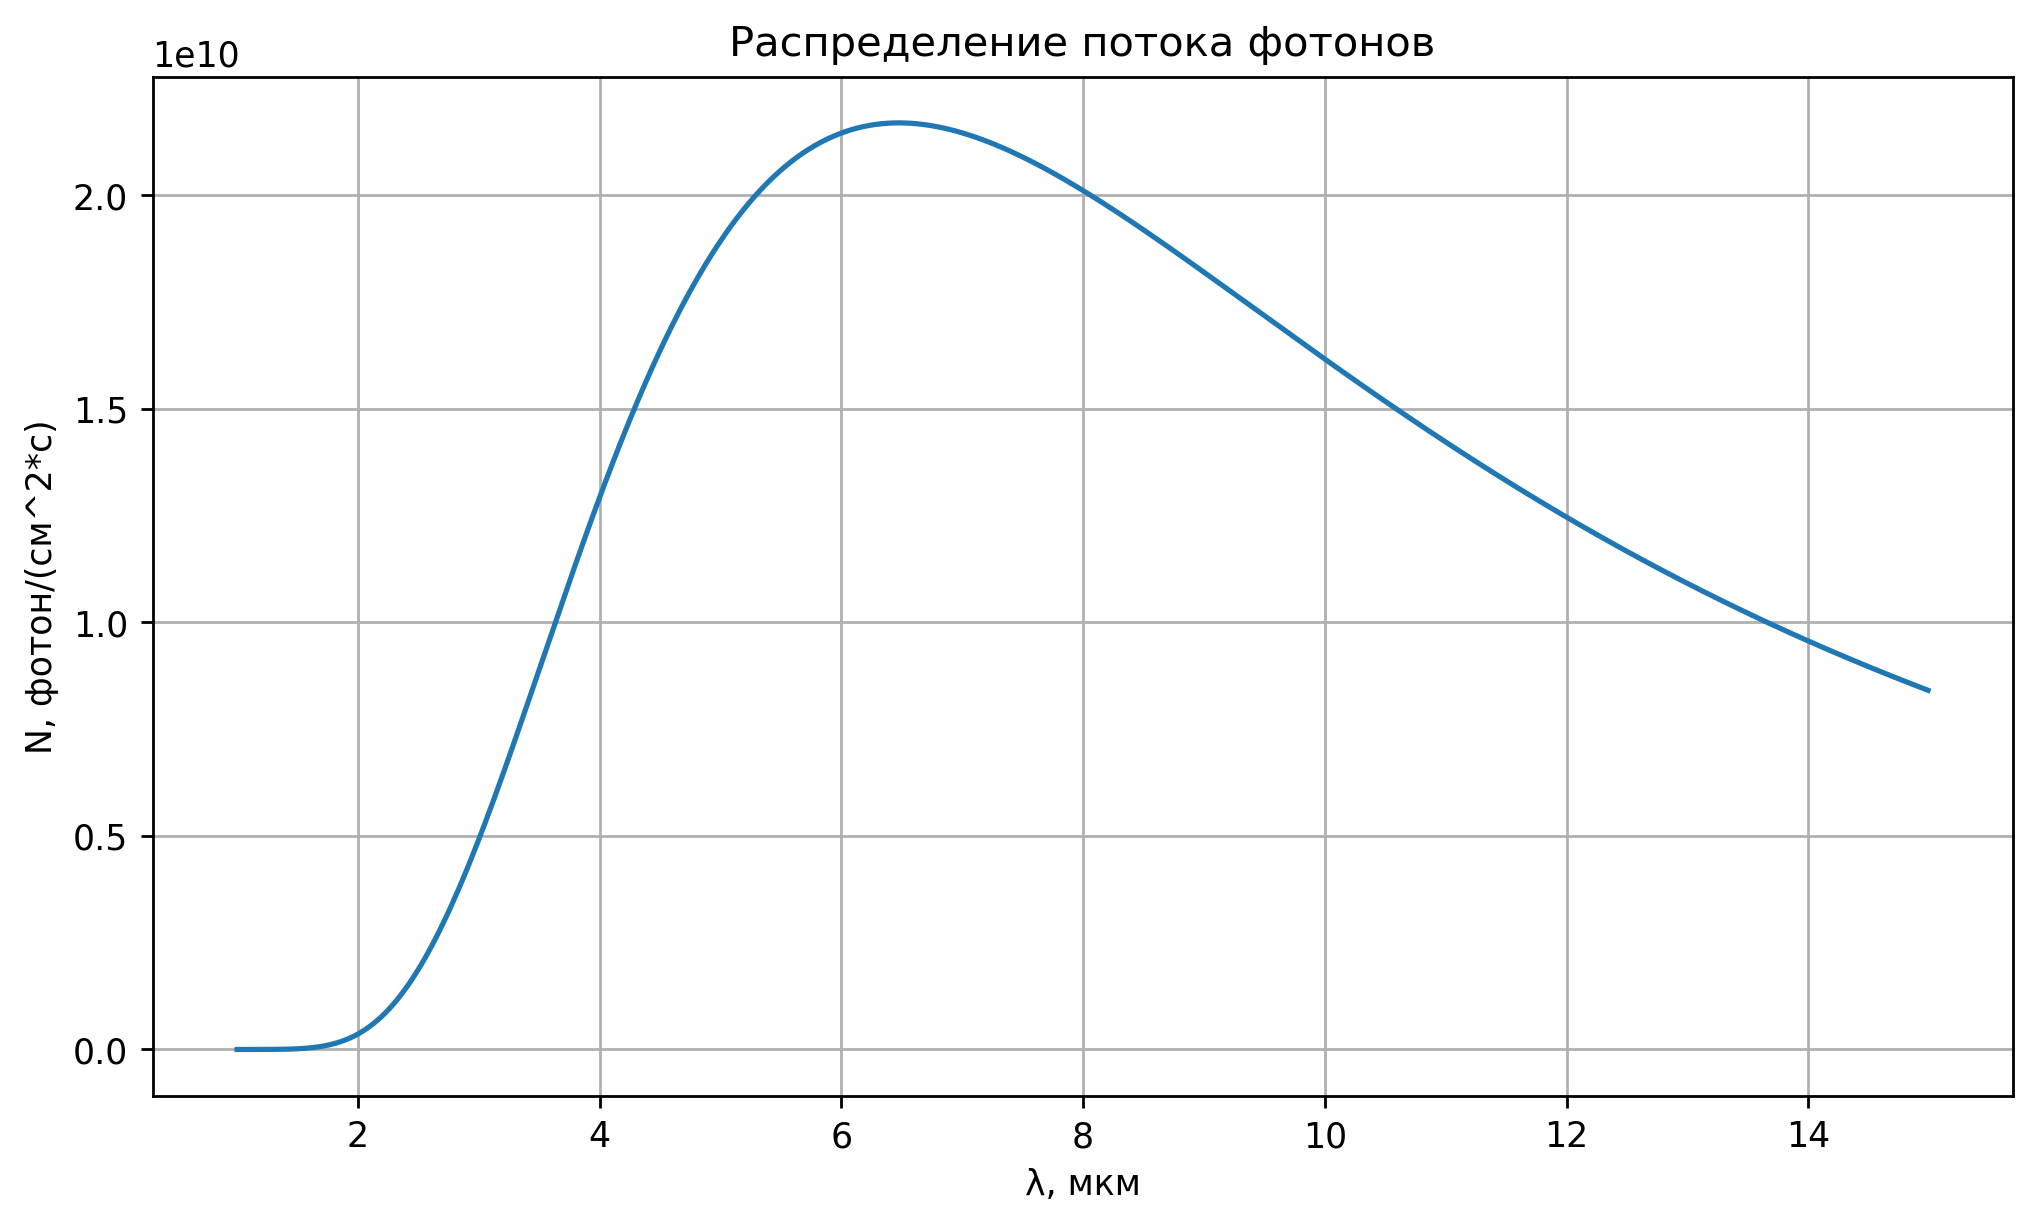

In [7]:
def N(lambd):
    N = np.zeros(len(lambd))
    for i in range(0, len(lambd)):
        N[i] =(2*np.pi*c/(lambd[i]**4))*(1/(np.exp((h*c)/(lambd[i]*Tbb*k))-1))*1e-18
    return N
Npht=N(lambd)
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("λ, мкм") 
ax.set_ylabel("N, фотон/(см^2*с)") 
ax.set_title('Распределение потока фотонов')
ax.plot(lambd*1e6, Npht,);

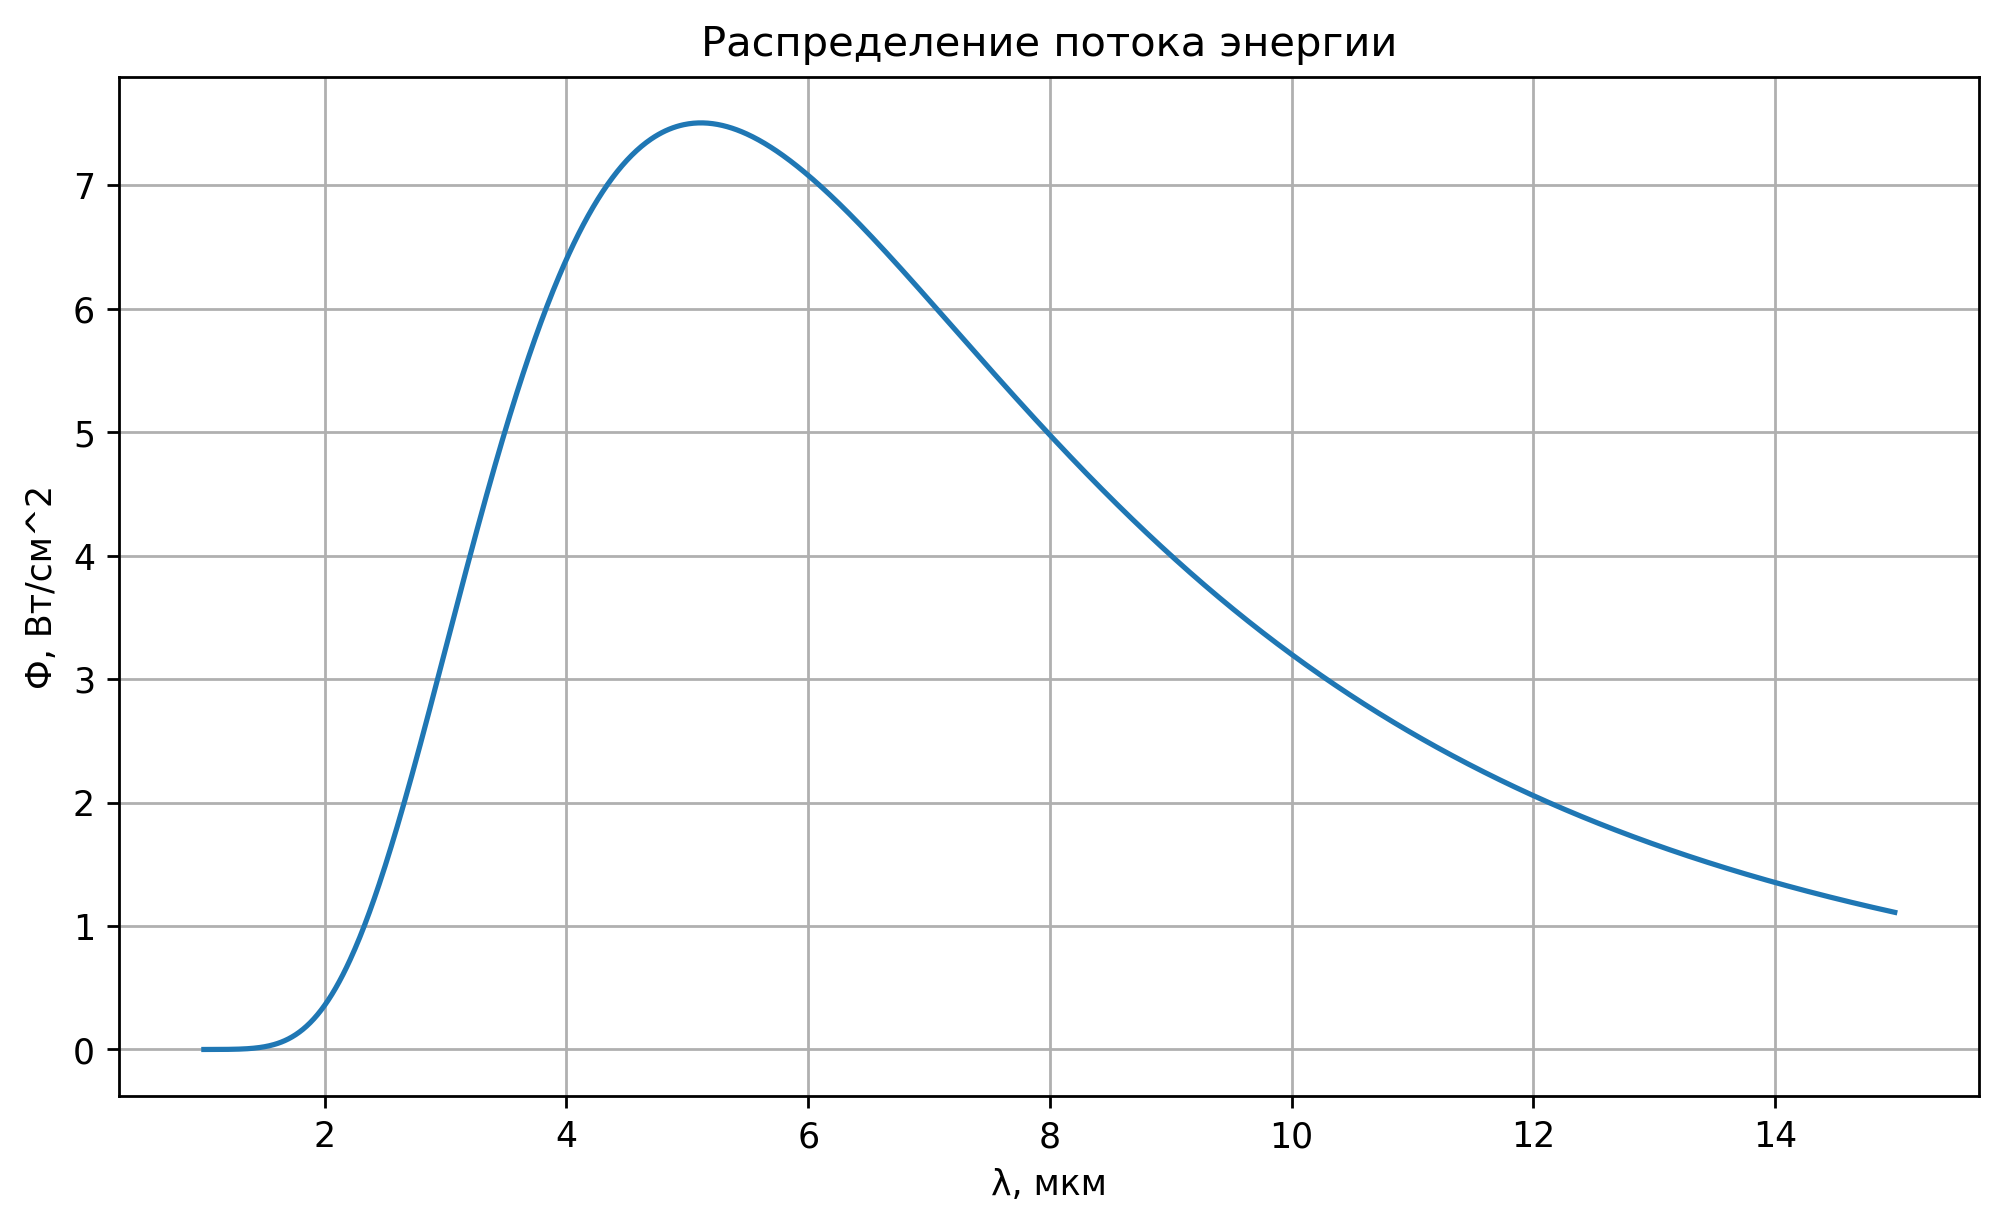

In [8]:
def Ф(lambd):
    Ф = np.zeros(len(lambd))
    for i in range(0, len(lambd)):
        Ф[i] =(2*np.pi*h*c**2/(lambd[i]**5))*(1/(np.exp((h*c)/(lambd[i]*Tbb*k))-1))*1e-8
    return Ф

Фpht = Ф(lambd)
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("λ, мкм") 
ax.set_ylabel("Ф, Вт/см^2") 
ax.set_title('Распределение потока энергии')
ax.plot(lambd*1e6, Фpht,);

2.1Построить зависимости коэффициента поглощения от энергии и длины 
волны падающего излучения. 

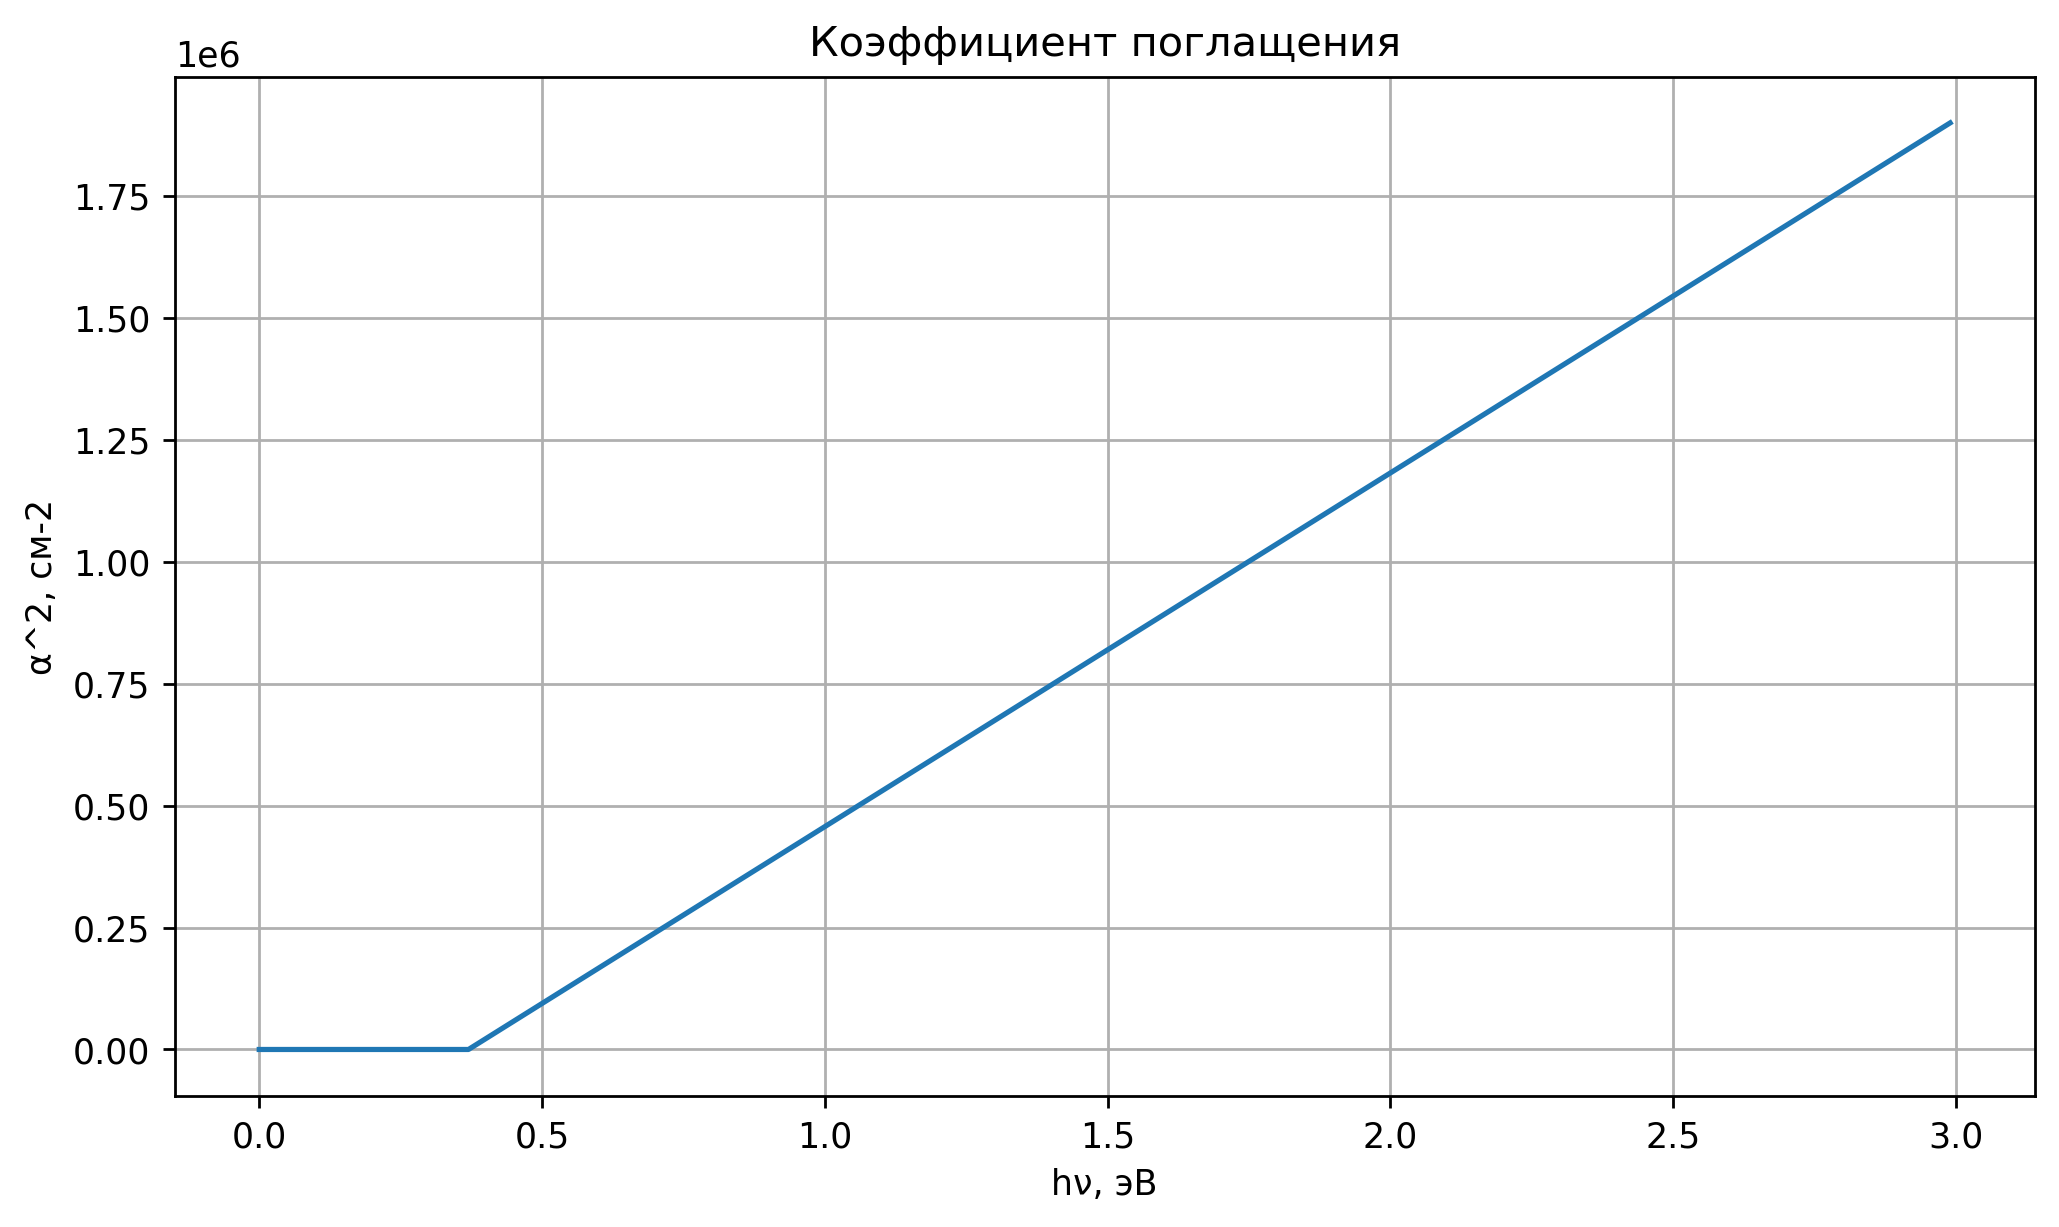

In [9]:
A = (q**2.5*(m)**1.5)/(n*c*h**2*m*ep)
E = np.arange(0, 3, 1e-2)
alpha2 = np.zeros(len(E))

for i in range(0, len(E)):
    if(E[i]<Eg):
        alpha2[i] = 0
    else:
         alpha2[i] =A*(E[i]-Eg)  
    
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("hν, эВ") 
ax.set_ylabel("α^2, см-2") 
ax.set_title('Коэффициент поглащения')
ax.plot(E, alpha2);

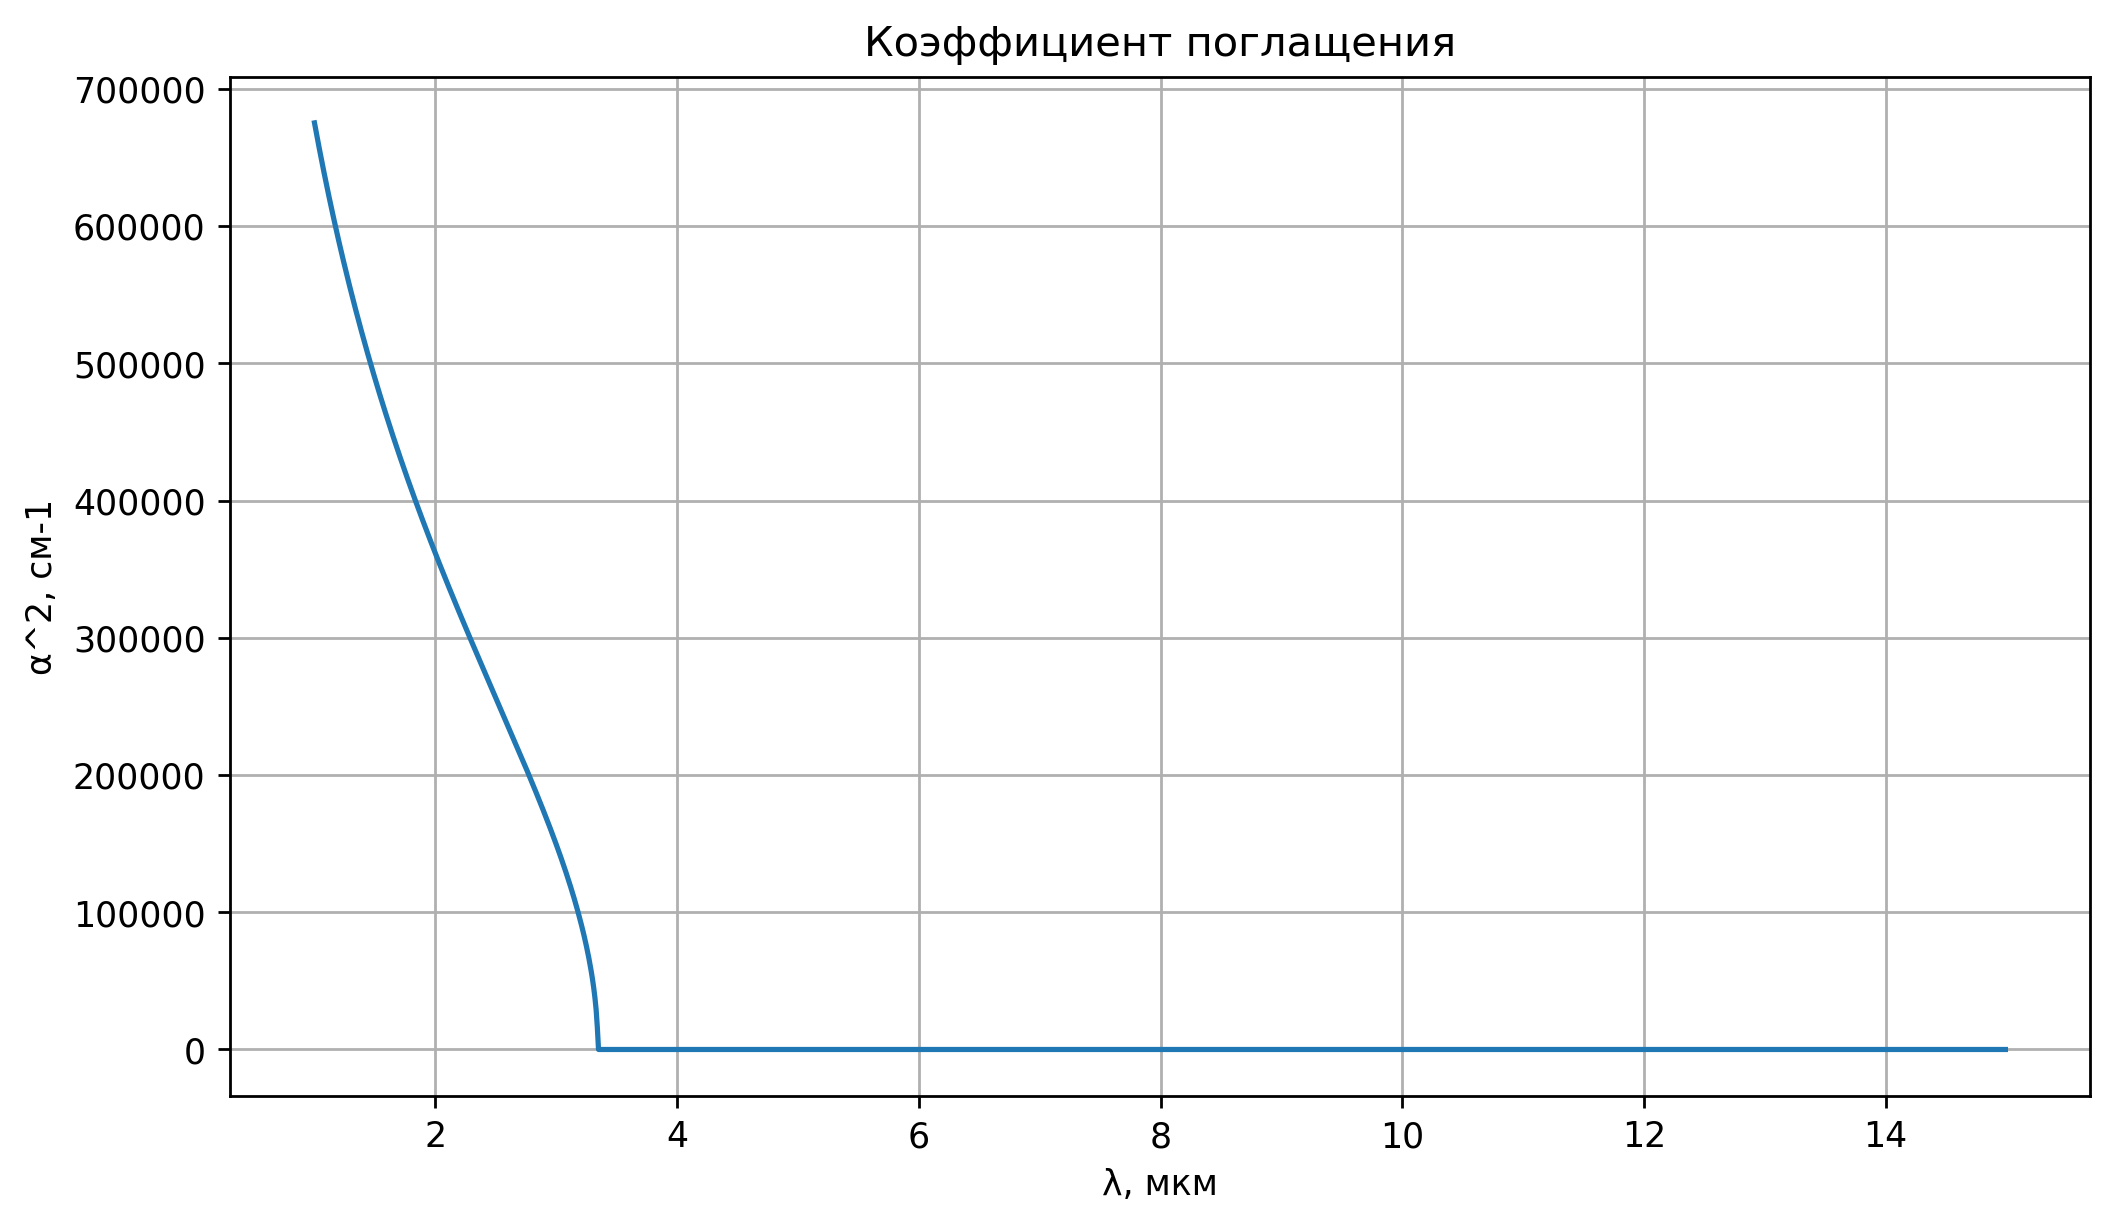

In [12]:
def Alpha(lambd):
    alpha1 = np.zeros(len(lambd))

    for i in range(0, len(lambd)):
        if(h*c/(lambd[i]*q)<Eg):
            alpha1[i] = 0
        else:
            alpha1[i] =A*(h*c/(lambd[i]*q)-Eg)**0.5
    return alpha1


alp=Alpha(lambd)
          
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("λ, мкм") 
ax.set_ylabel("α^2, см-1") 
ax.set_title('Коэффициент поглащения')
ax.plot(lambd*1e6, alp);


2.2 Определить границы длин волн, в которых преобладает равномерное и неравномерное поглощение.
αкр=1/d=66000.Значит границы равномерного поглощения лежат в пределах от 3.2 до 3.3 мкм. Неравномерное поглощение наблюдается при длинах волн меньше 3.2 мкм.


2.3 Рассчитать среднюю скорость генерации носителей для различного типа 
поглощения;


Сначала рассчитаем скорость генерации для равномерного поглощения. квантовый выход равен 1.

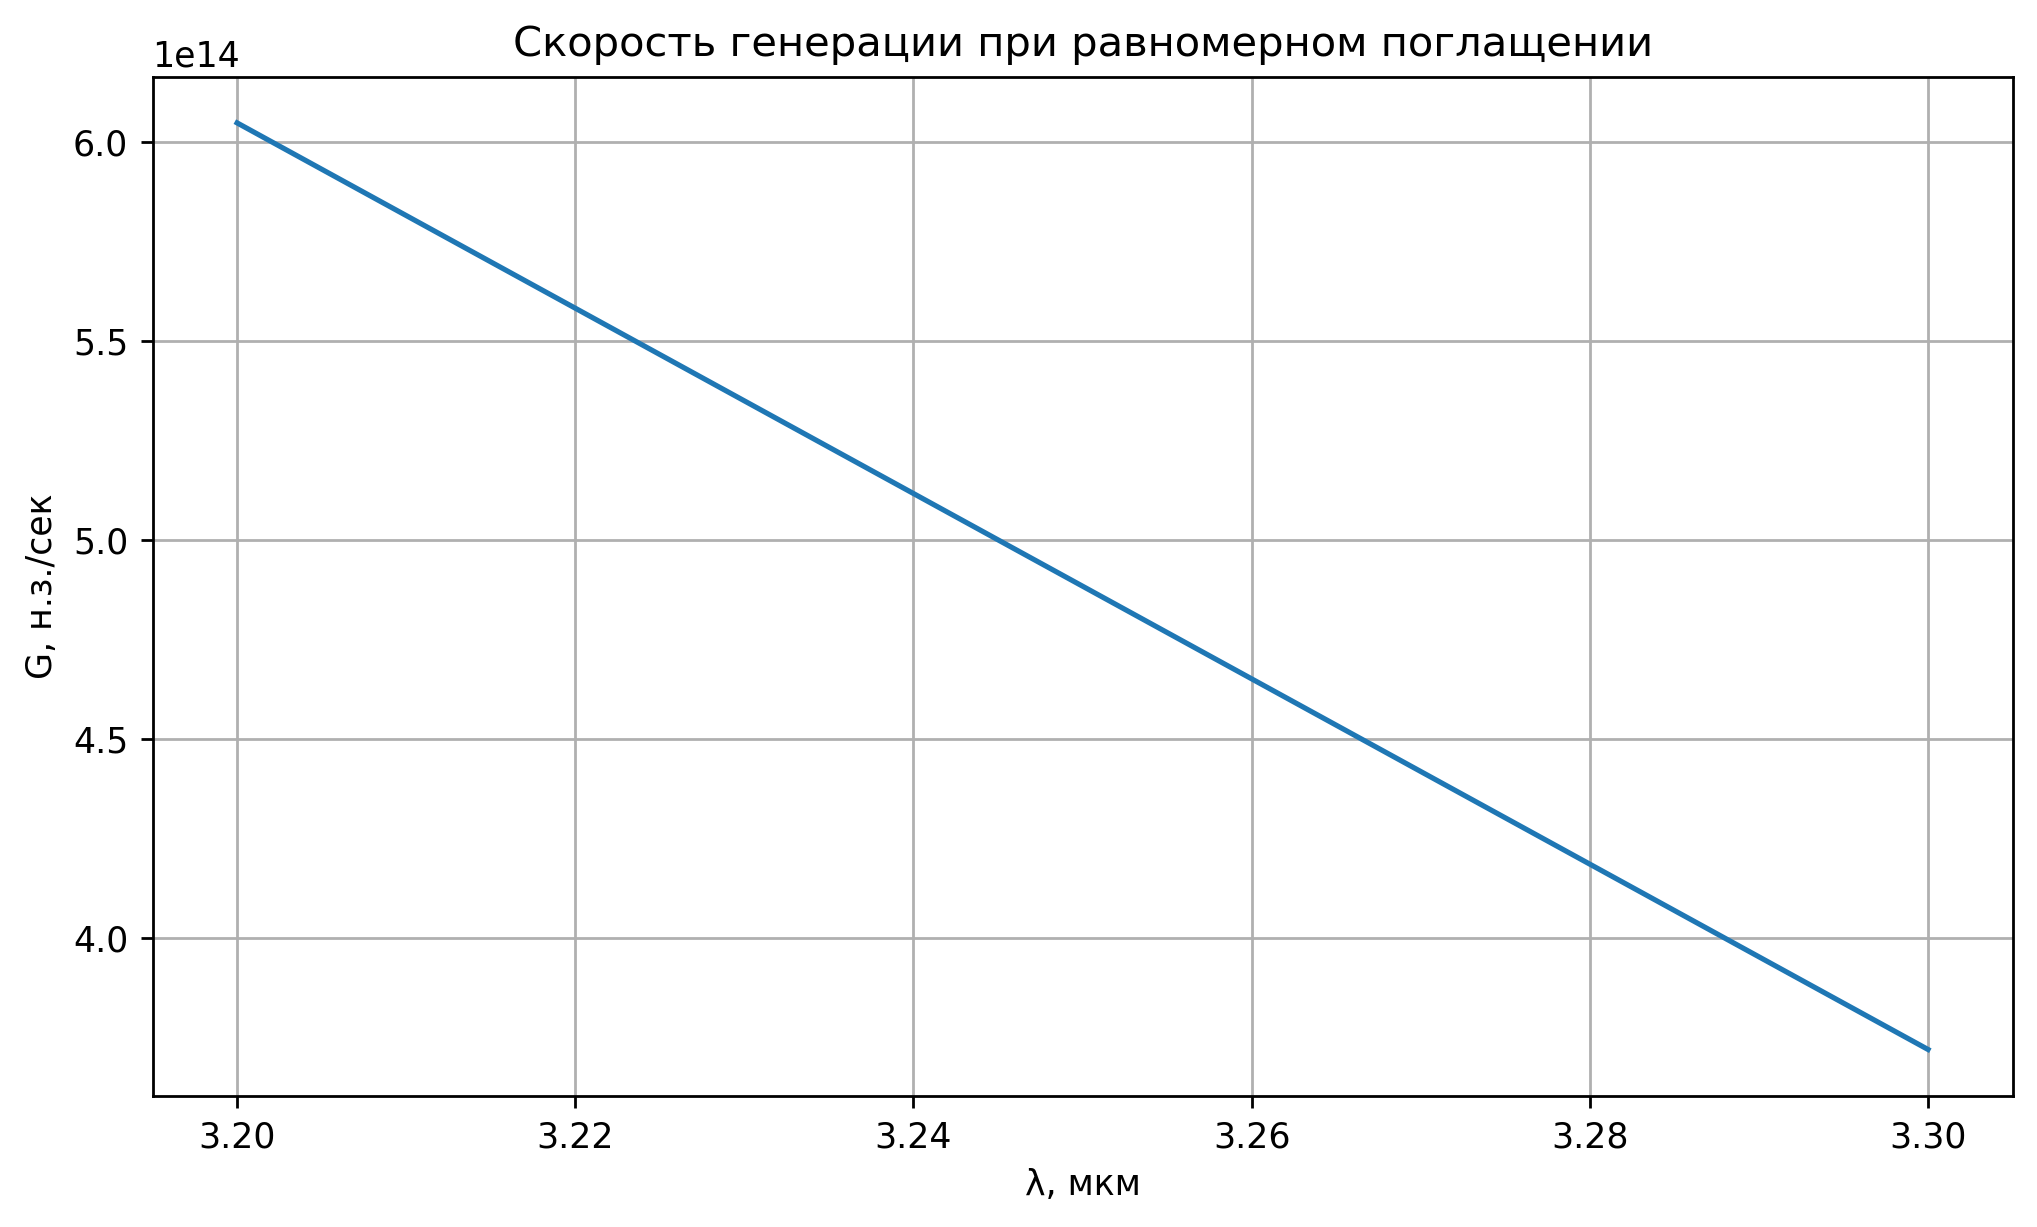

In [13]:
def G(lambd):
    G=np.zeros(len(lambd))
    for i in range(0, len(lambd)):
        G[i]=(N(lambd)[i])*(Alpha(lambd)[i])
    return G
        
lambd1=np.arange(3.2e-6, 3.3e-6, 1e-7)
G1=G(lambd1)  
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("λ, мкм") 
ax.set_ylabel("G, н.з./сек") 
ax.set_title('Скорость генерации при равномерном поглащении')
ax.plot(lambd1*1e6, G1);

Расчитаем скорость генерации для неравномерного поглащения

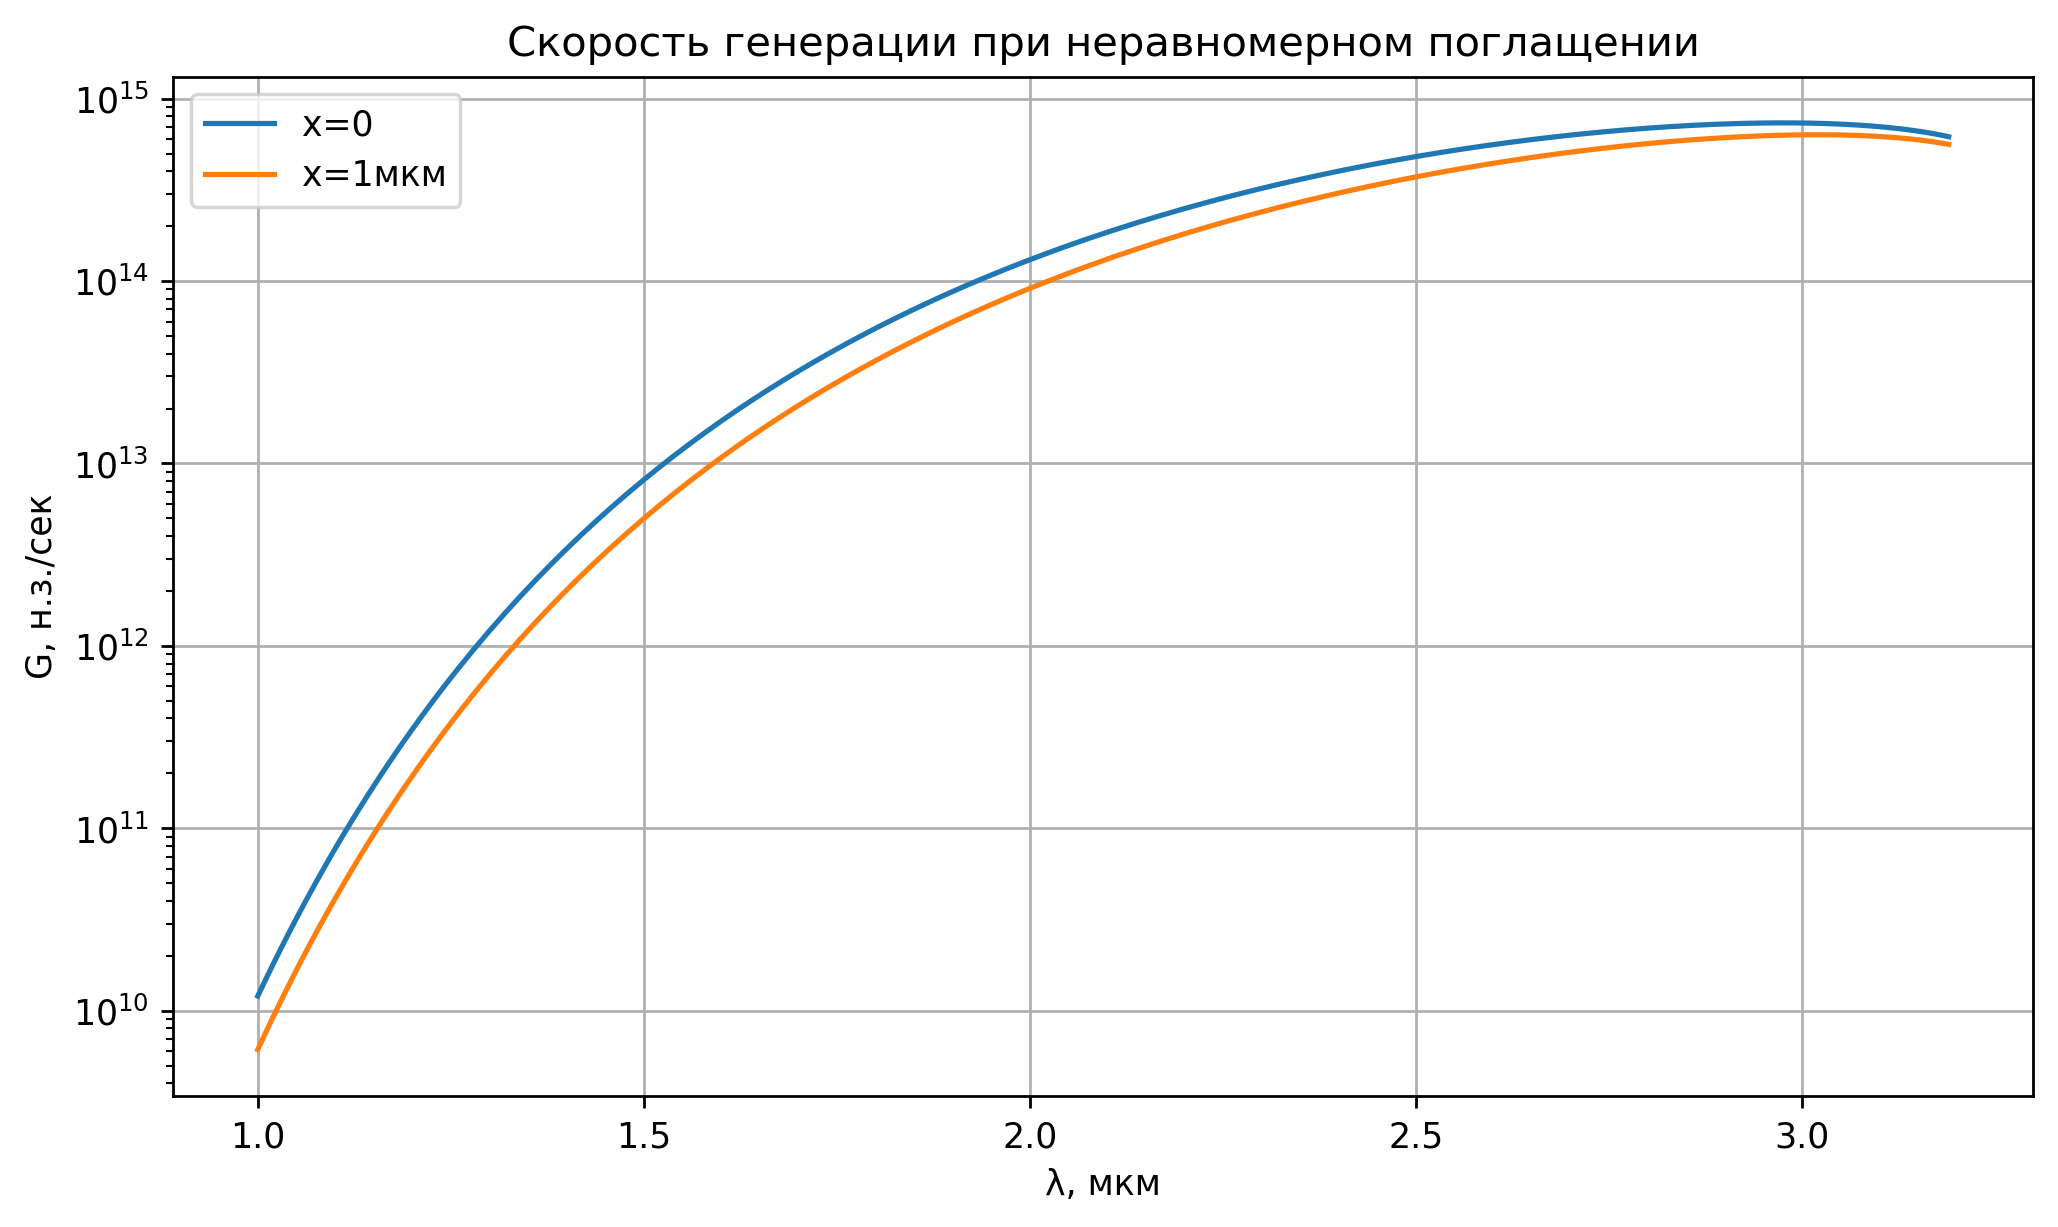

In [16]:
def Gn(lambd,x):
    Gn=np.zeros(len(lambd))
    for i in range(0, len(lambd)):
        Gn[i]=(N(lambd)[i])*(Alpha(lambd)[i])*np.exp(-((Alpha(lambd)[i])*x))
    return Gn


lambd2=np.arange(1e-6, 3.2e-6, 1e-8)
G2=Gn(lambd2,0)  
G3=Gn(lambd2,1e-6)  
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("λ, мкм") 
ax.set_ylabel("G, н.з./сек") 
ax.set_title('Скорость генерации при неравномерном поглащении')
ax.set_yscale('log')
ax.plot(lambd2*1e6, G2,lambd2*1e6,G3)
ax.legend(labels = ("x=0","x=1мкм","x=50 мкм"), loc="best");

Рассчитать и построить зависимости эффективного времени жизни (для 
двух типов поглощения) от скорости поверхностной рекомбинации;

Время жизни для равномерного поглащения

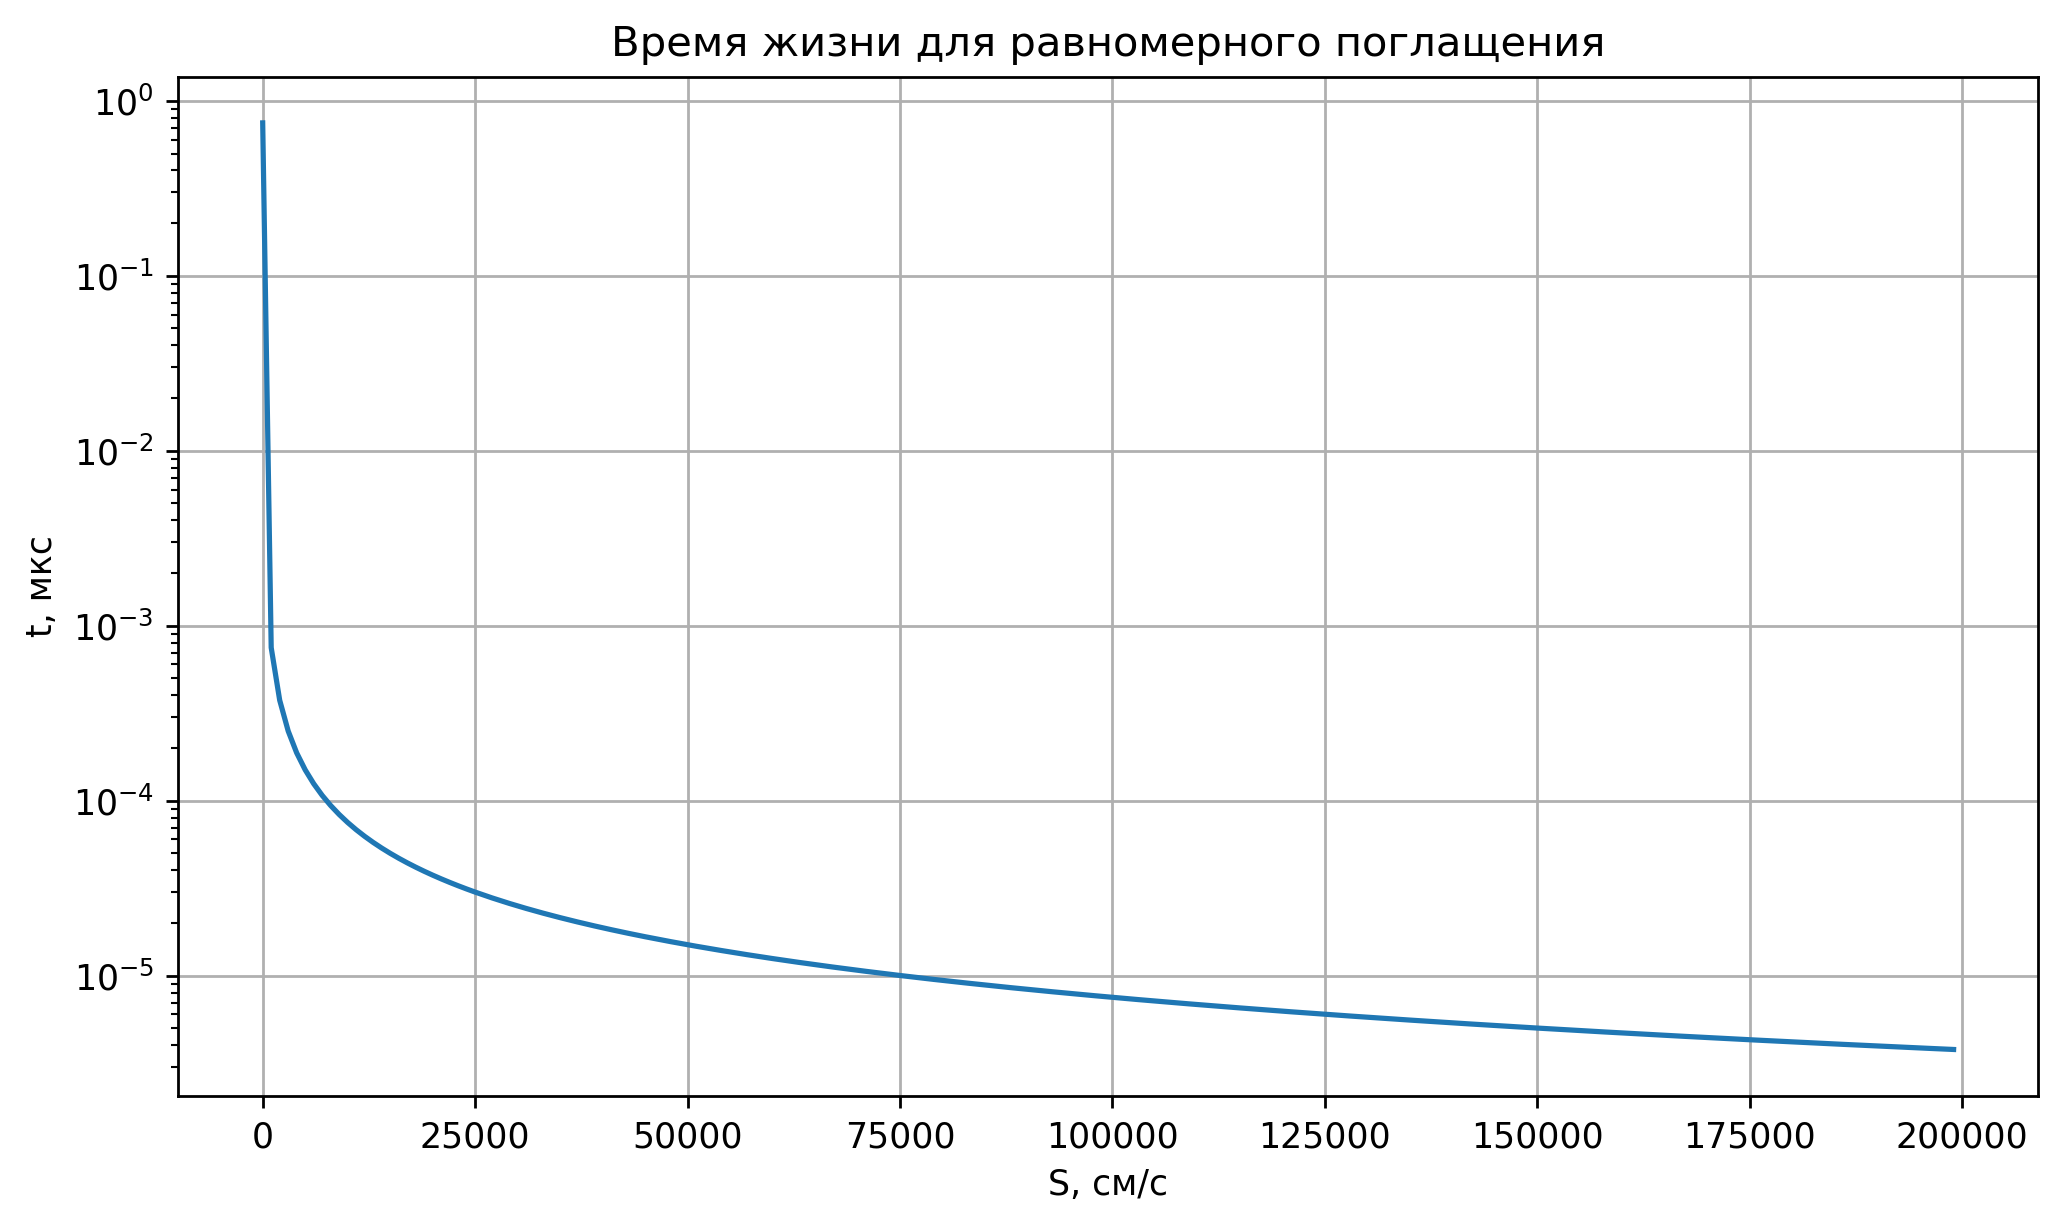

In [20]:
Dp=k*Tpr*up/q
Lp=np.sqrt(t*Dp)
t1 = np.zeros(200)
S = np.arange(1, 2e5, 1e3)
for i in range(0, 200):
    t1[i] =t*(1-(2*S[i]*Lp*np.sinh(d/(2*Lp))/d)/((Dp/Lp)*np.sinh(d/(2*Lp))+S[i]*np.cosh(d/(2*Lp))))
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("S, см/с") 
ax.set_ylabel("t, мкс") 
ax.set_title('Время жизни для равномерного поглащения')
ax.plot(S, t1*1e6);
ax.set_yscale('log')


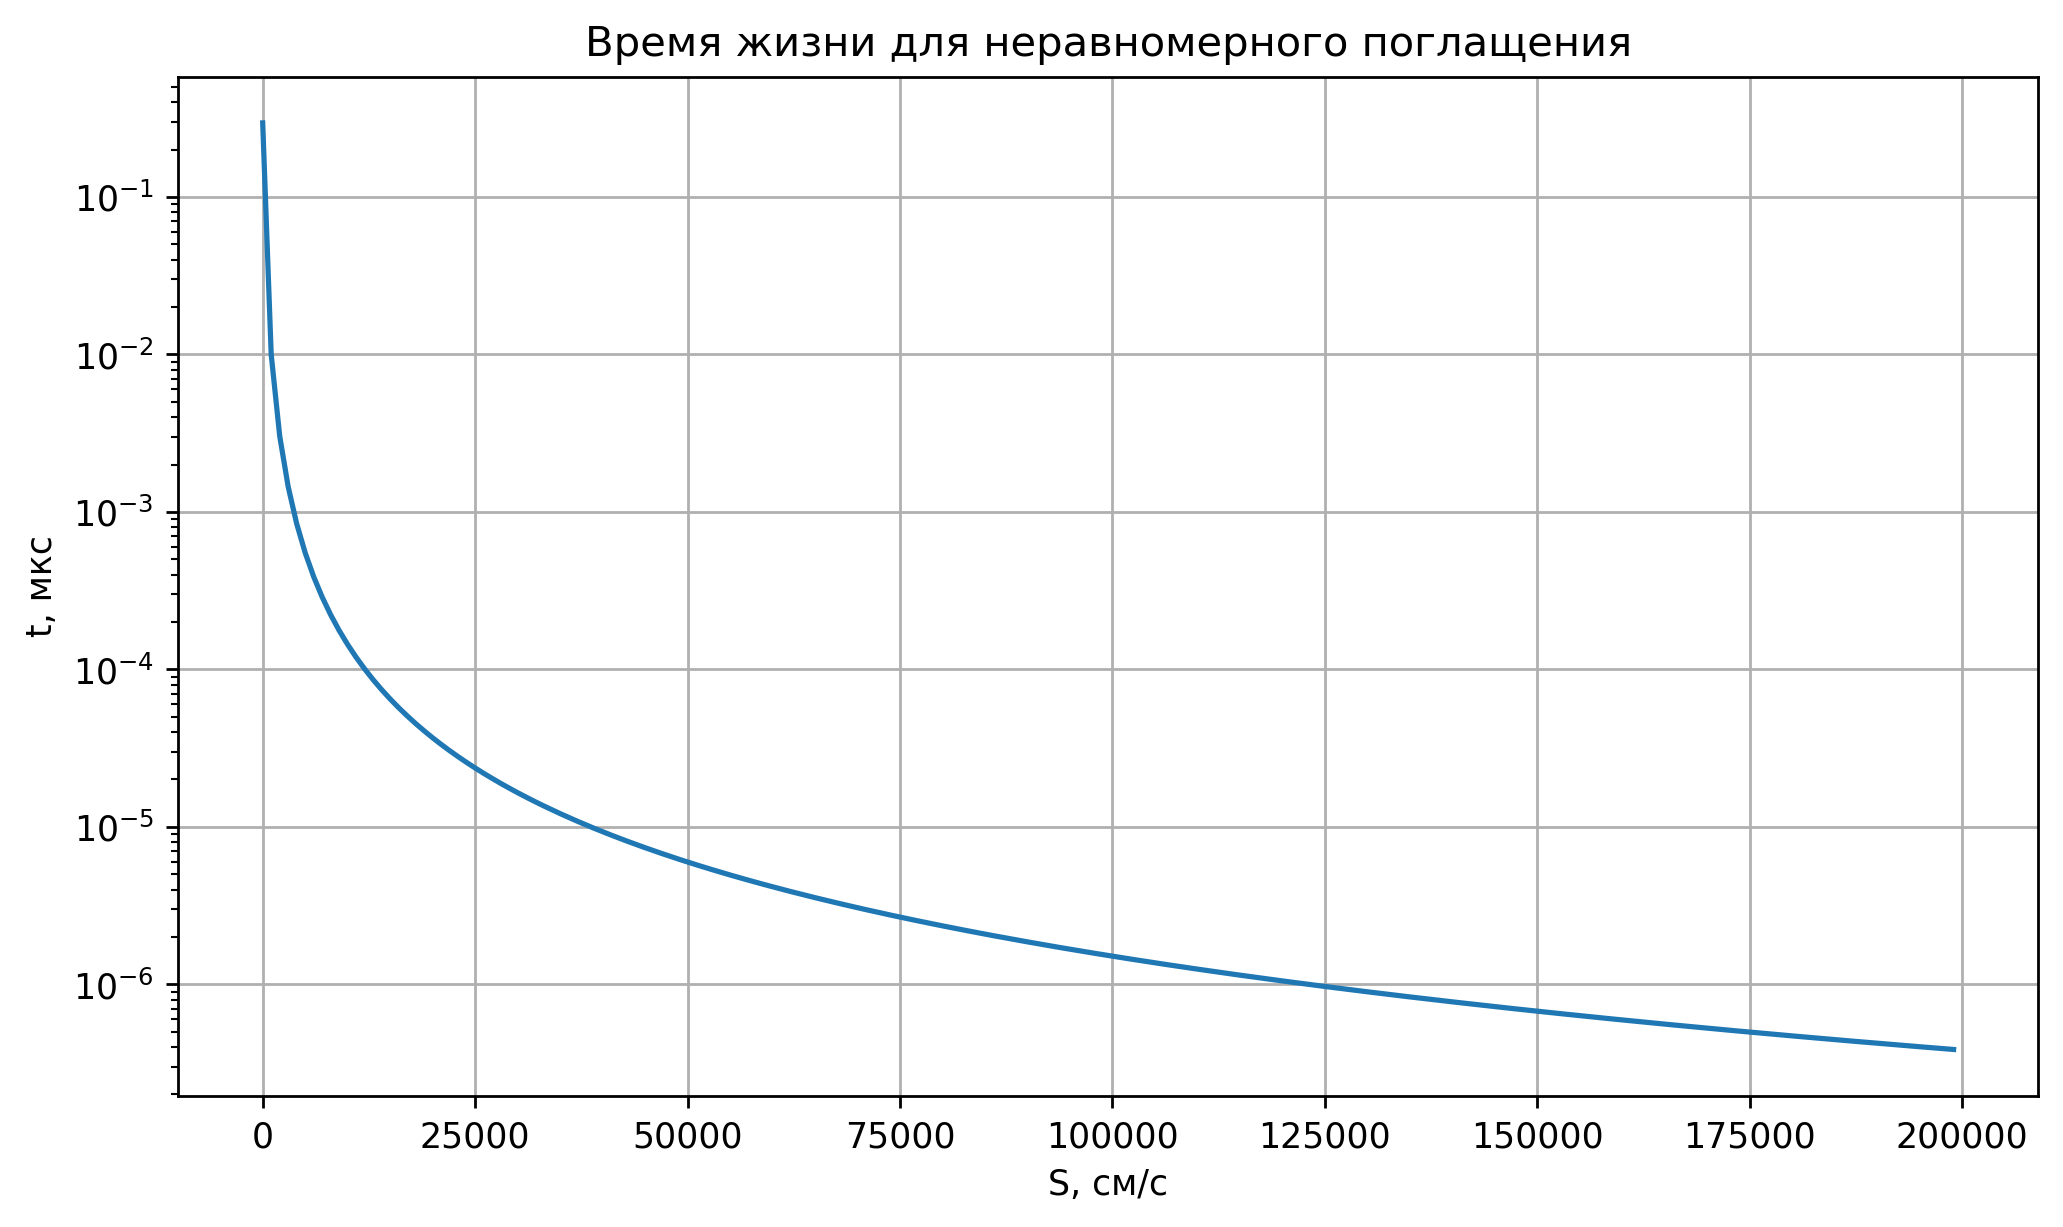

In [23]:

def tef(S,lambd,x):
    tef=np.zeros(len(S))
    for i in range(0, len(S)):
        tef[i]=t/Alpha(lambd)*(t*S[i]*np.sinh((d-x)/Lp)+Lp*np.cosh((d-x)/Lp))*1e1/((Lp**2+t**2*(S[i])**2)*np.cosh(d/Lp)+2*Lp*t*S[i]*np.cosh(d/Lp))
    return tef

t2 = tef(S,[3.0e-6],0)

fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("S, см/с") 
ax.set_ylabel("t, мкс") 
ax.set_title('Время жизни для неравномерного поглощения')
ax.plot(S, t2*1e6);

ax.set_yscale('log')

2.5  Рассчитать  сопротивление  ФР  при  наличии  падающего  излучения, рассчитать во сколько раз оно отличается от темнового;


In [34]:
Gg=1.52e11*Tbb**3*Alpha([3.2e-6])*1e1
ng=ni+Gg*tef([Su],[3.2e-6],0) 
Rs0 = 1/(ng*q*(un+up))*1/d
Rs='%.2f'%Rs0
r=Rt/Rs0
print("Сопротивление при наличии падающего излучения",Rs,"Ом")
print("Разница между темновым и световым сопротивление",'%.2f'%r)

Сопротивление при наличии падающего излучения 1950403.15 Ом
Разница между темновым и световым сопротивление 1.04


2.6  Рассчитать и построить световую ВАХ ФР;

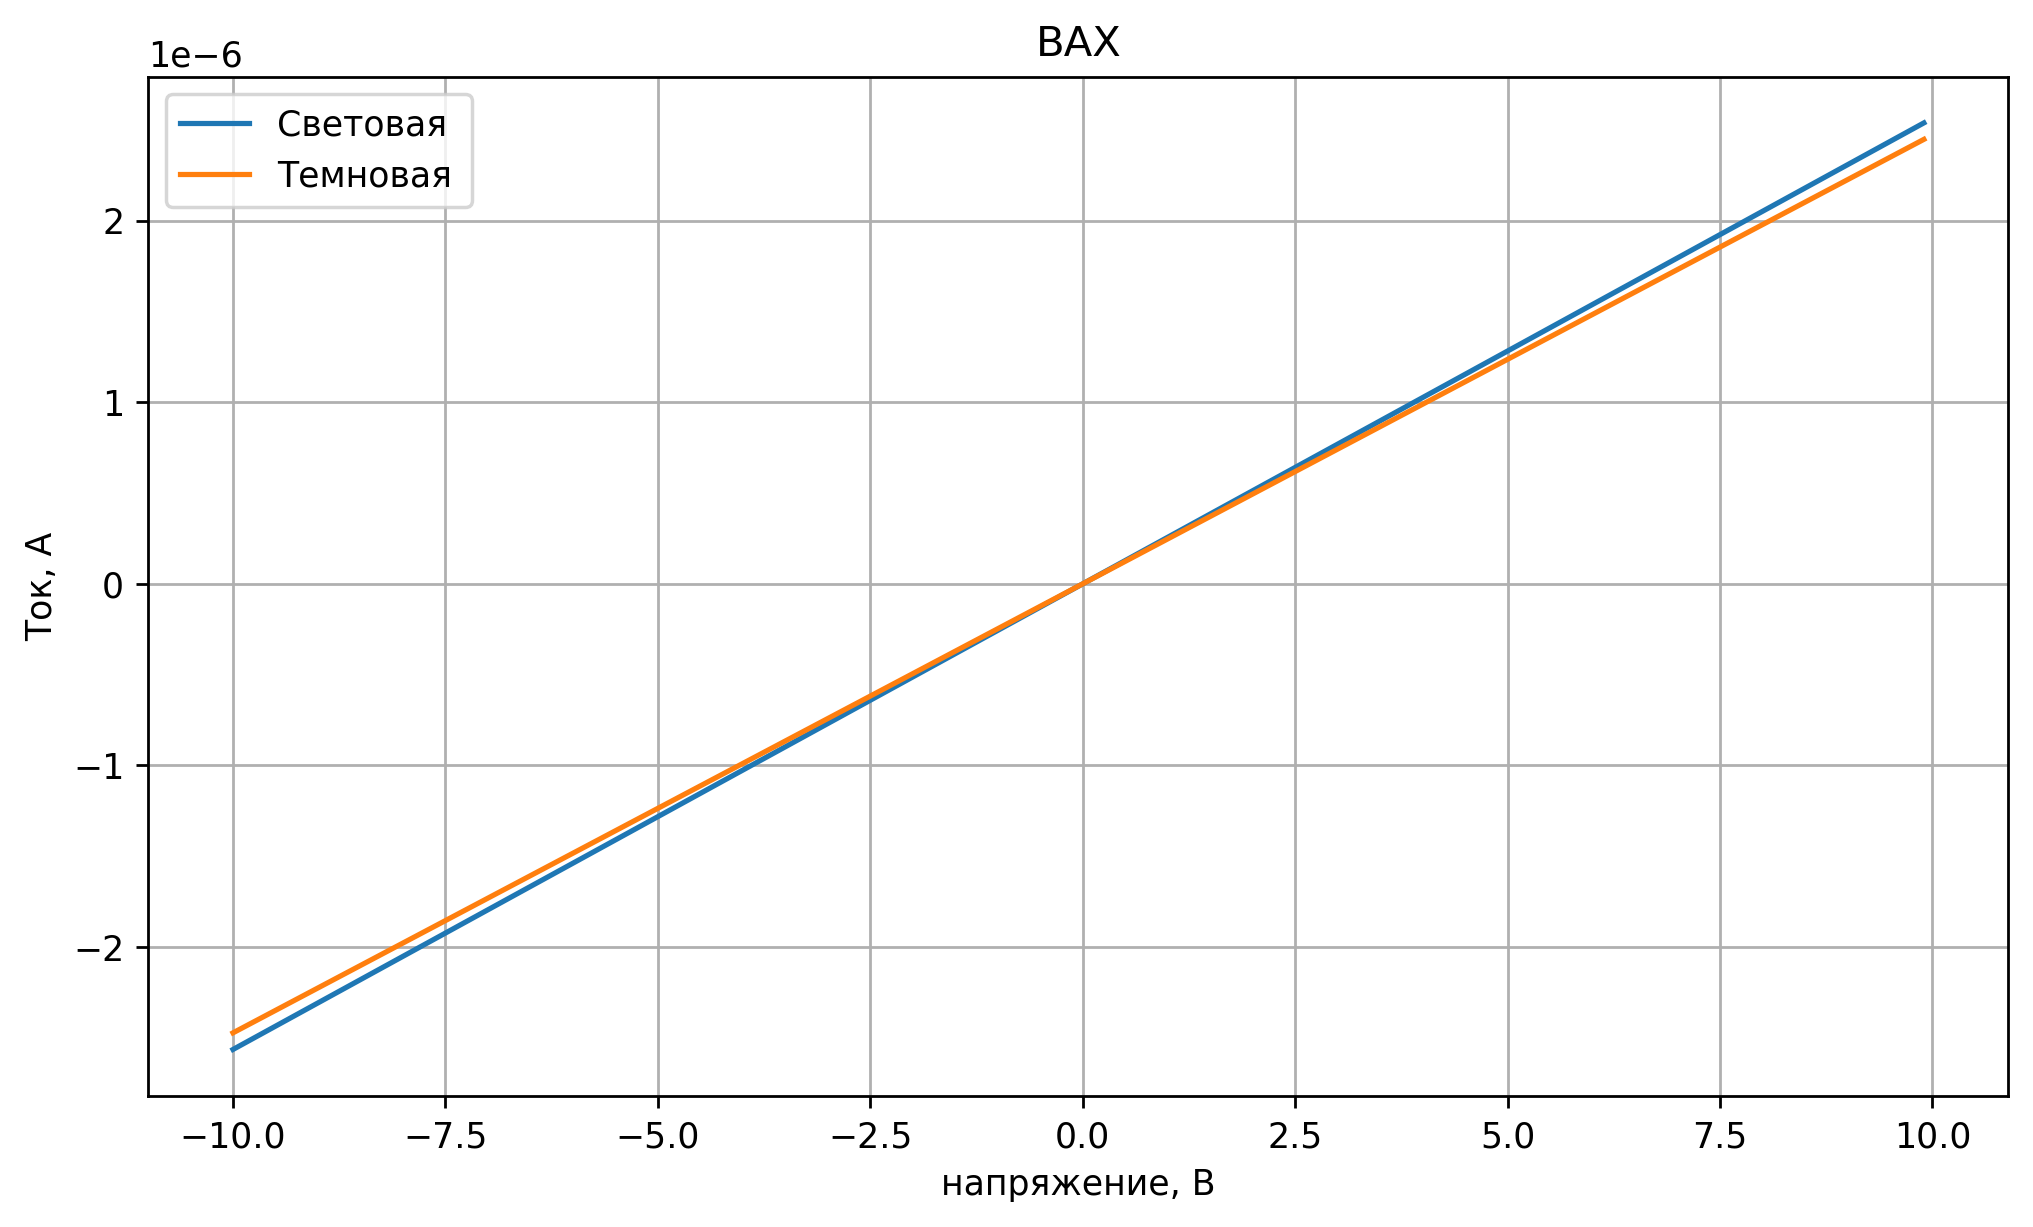

In [35]:
Iphs = np.zeros(200)
for i in range(0, 200):
    Iphs[i] = V0[i]/(2*(Rs0));
 
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("напряжение, В") 
ax.set_ylabel("Ток, А") 
ax.set_title('ВАХ')
ax.plot(V0, Iphs,V0,Ipht);
ax.legend(labels = ("Световая ","Темновая"), loc="best");




2.7  Рассчитать интегральную чувствительность.

In [55]:
Ss=(Lp*np.sinh(d/Lp)+t*Su*(np.cosh(d/Lp)-1))*2e10*(Lp+t*Su)/((Lp**2+t**2*(Su)**2)*np.cosh(d/Lp)+2*Lp*t*Su*np.cosh(d/Lp))
def Si(lambd):
    Si = Ss*q/(h*c)*(A*(h*c/(lambd*q)-Eg)**0.5*lambd)*(tef([Su],[3.0e-6],0)*up*Lp*(1+un/up))/(Lp+Su*tef([Su],[3.0e-6],0))*5*d
    return Si
Sin=quad(Si, 0, 3.2e-6)[0]
print(Sin)



6.867687287502637e-12


Интегральная чувсвительность составила 6.73 10^-12

3.1  Рассчитать  и  построить спектральные зависимости  концентрации 
носителей зарядов от падающего излучения; 

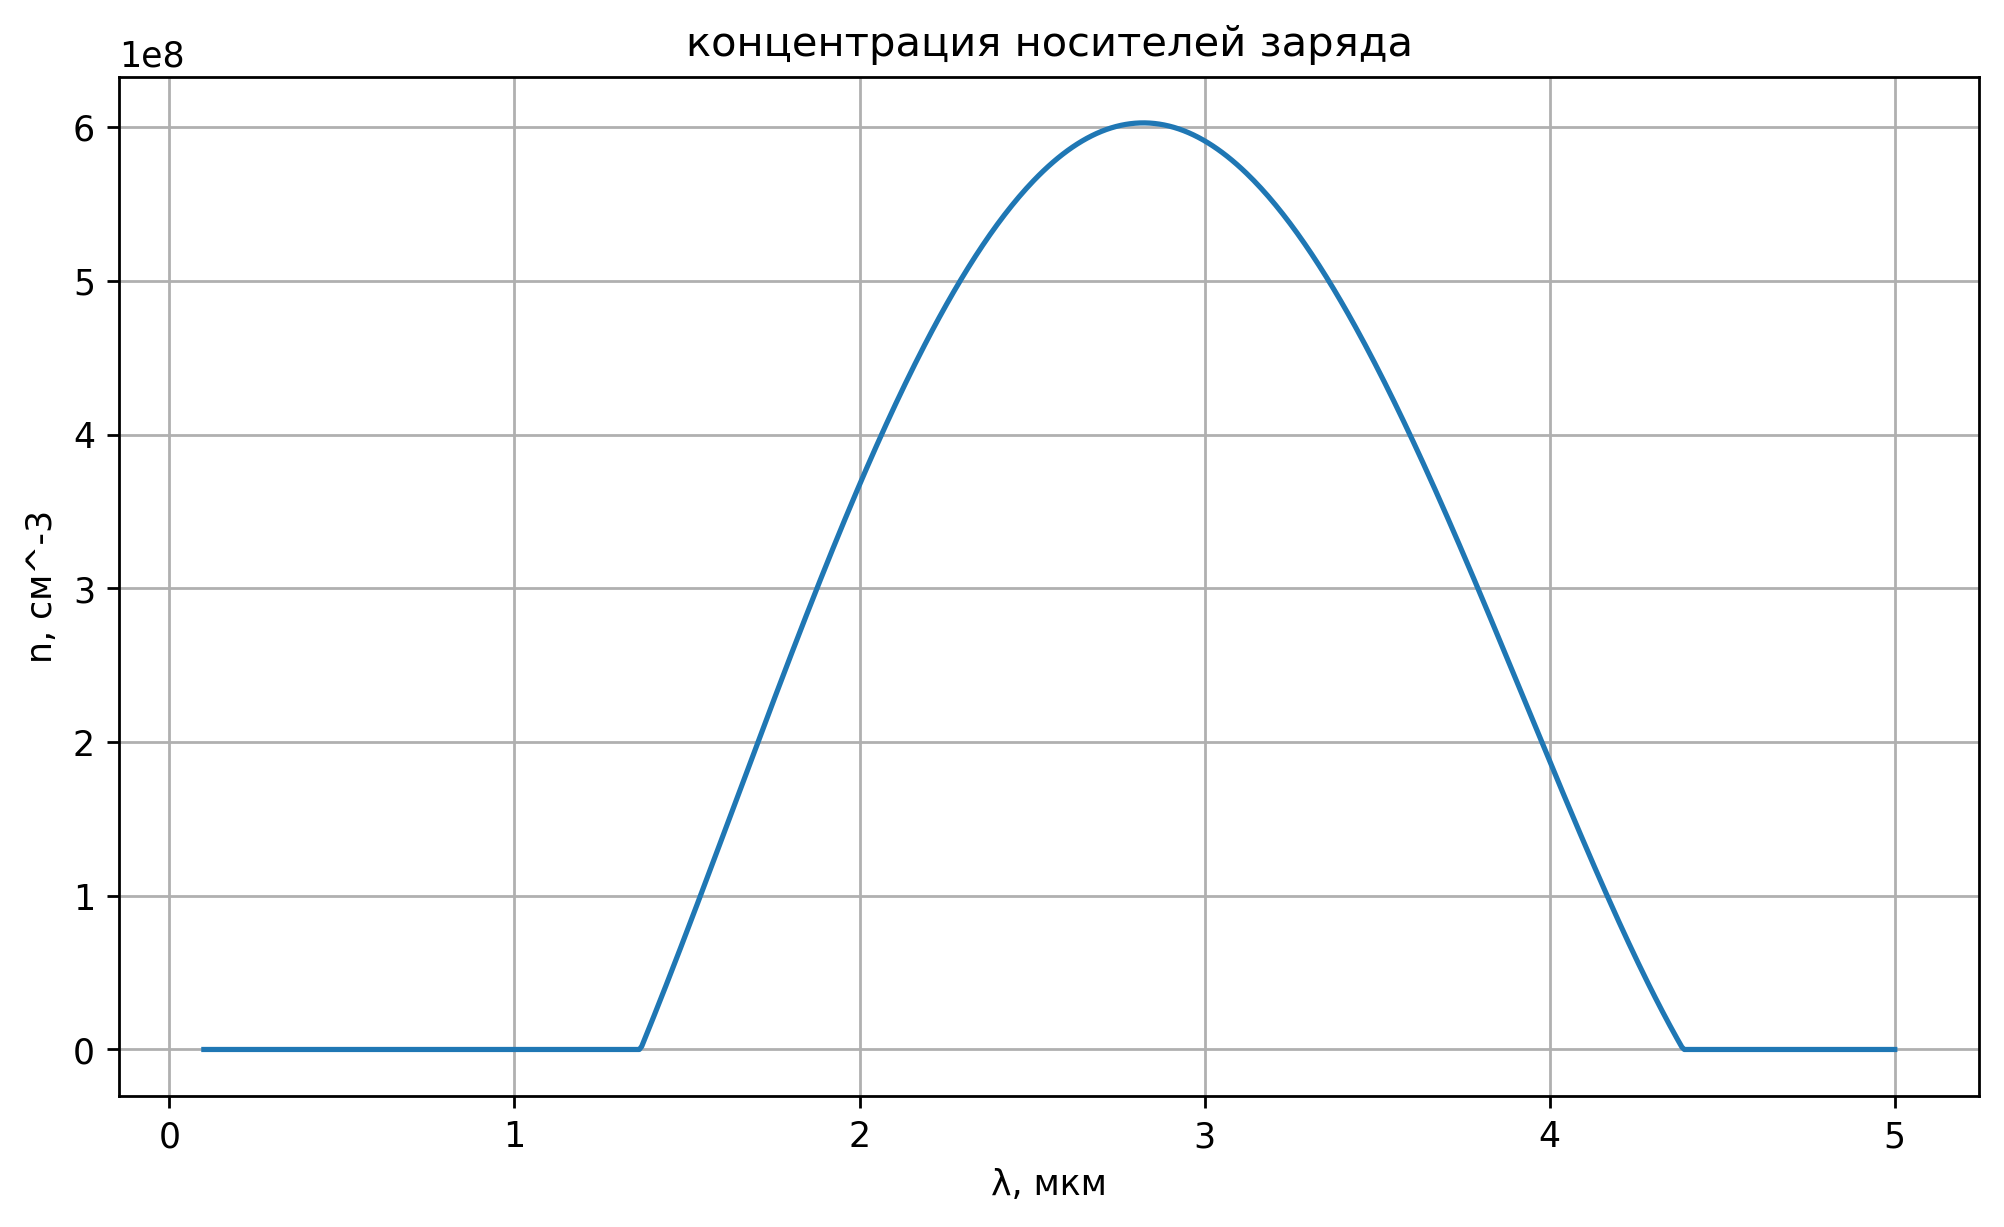

In [56]:
def nd(lambd):
    nd=np.zeros(len(lambd))
    for i in range(0, len(lambd)):
        if(h*c/(lambd[i]*q)<=Eg):
            nd[i] = 0
        else:
            nd[i] =Gn(lambd,0)[i]*t/Alpha(lambd)[i]*(t*Su*np.sinh((d)/Lp)+Lp*np.cosh((d)/Lp))*1e7/((Lp**2+t**2*(Su)**2)*np.cosh(d/Lp)+2*Lp*t*Su*np.cosh(d/Lp))
    return nd

lambd3=np.arange(1e-7, 5e-6, 1e-7)
nn = np.zeros(len(lambd3))
nn =nd(lambd3)

x = np.linspace(1e-7, 5e-6, 700)
y0 = Polynomial.fit(lambd3, nn, 4)
Nn = np.zeros(len(x))
for i in range(0, len(x)):
    if(y0(x)[i]<0)|(x[i]<1.1e-6):
        Nn[i]=0
    else:
        Nn[i]=y0(x)[i]
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("λ, мкм") 
ax.set_ylabel("n, см^-3") 
ax.set_title('концентрация носителей заряда')

ax.plot(x*1e6, Nn);


3.2 Рассчитать и построить зависимости фототока от падающего излучения;

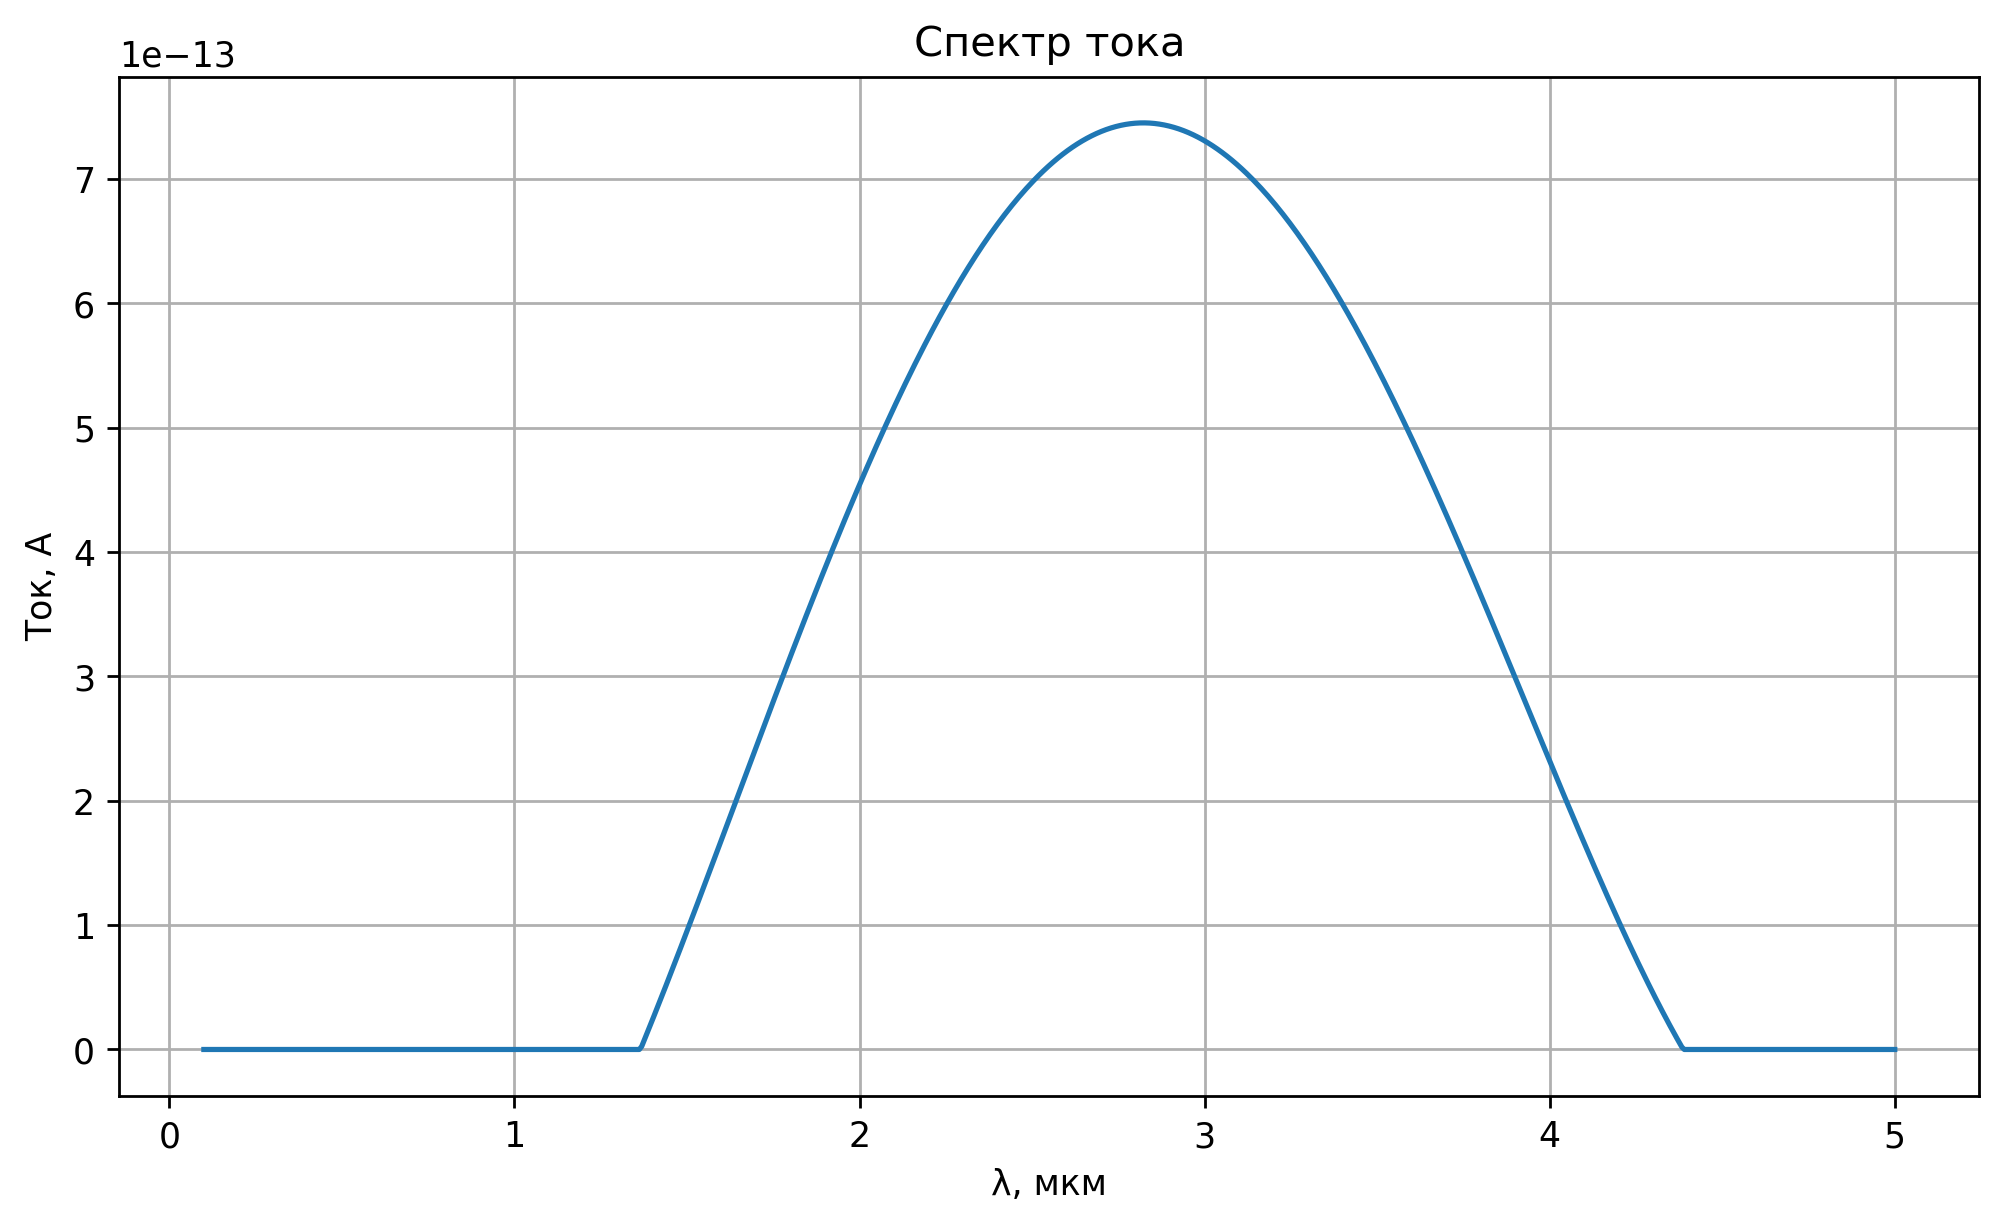

In [57]:
Iph = np.zeros(len(lambd3))
for i in range(0, len(lambd3)):
    Iph[i] = 5*((nn[i])*q*(un+up))*d
x = np.linspace(1e-7, 5e-6, 700)
y0 = Polynomial.fit(lambd3, Iph, 4)
Ip = np.zeros(len(x))
for i in range(0, len(x)):
    if(y0(x)[i]<0)|(x[i]<1e-6):
        Ip[i]=0
    else:
        Ip[i]=y0(x)[i]
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("λ, мкм") 
ax.set_ylabel("Ток, А") 
ax.set_title('Спектр тока')
ax.plot(x*1e6, Ip);


3.3  Рассчитать  и  построить  зависимость  токовой  чувствительности  от 
падающего излучения;

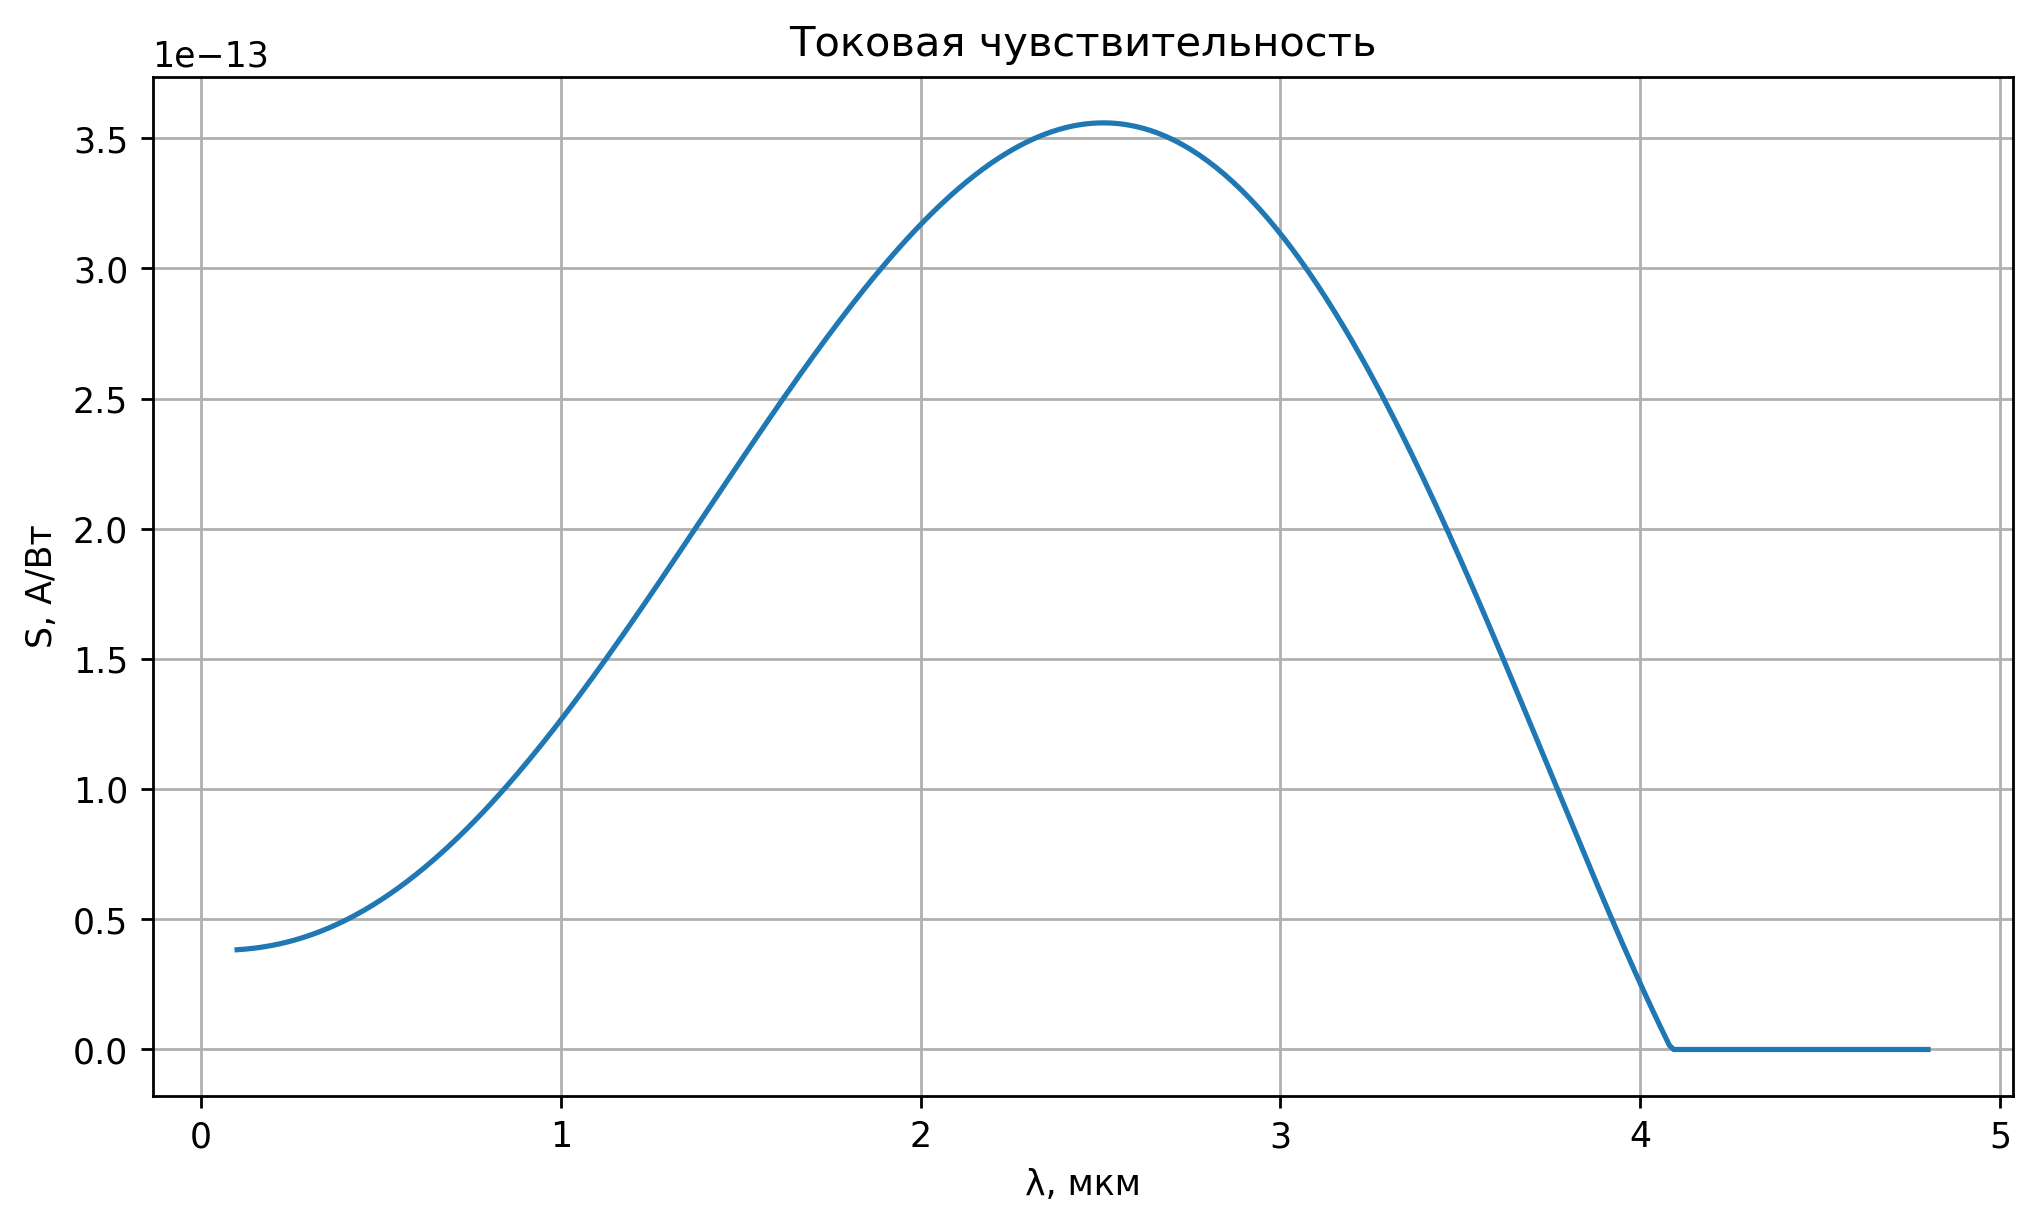

In [58]:
Siph = np.zeros(len(lambd3))
Фi=Ф(lambd3)
for i in range(0, len(lambd3)):
    Siph[i] = Iph[i]/Фi[i];
x = np.linspace(1e-7, 4.8e-6, 400)
y1 = Polynomial.fit(lambd3, Siph, 5)
Sph = np.zeros(len(x))
for i in range(0, len(x)):
    if(y1(x)[i]<0):
        Sph[i]=0
    else:
        Sph[i]=y1(x)[i]

fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("λ, мкм") 
ax.set_ylabel("S, А/Вт") 
ax.set_title('Токовая чувствительность')
ax.plot(x*1e6, Sph);

3.4 Приняв,  ГРШ  как  основной  шум,  рассчитать  интегральную 
обнаружительную способность.

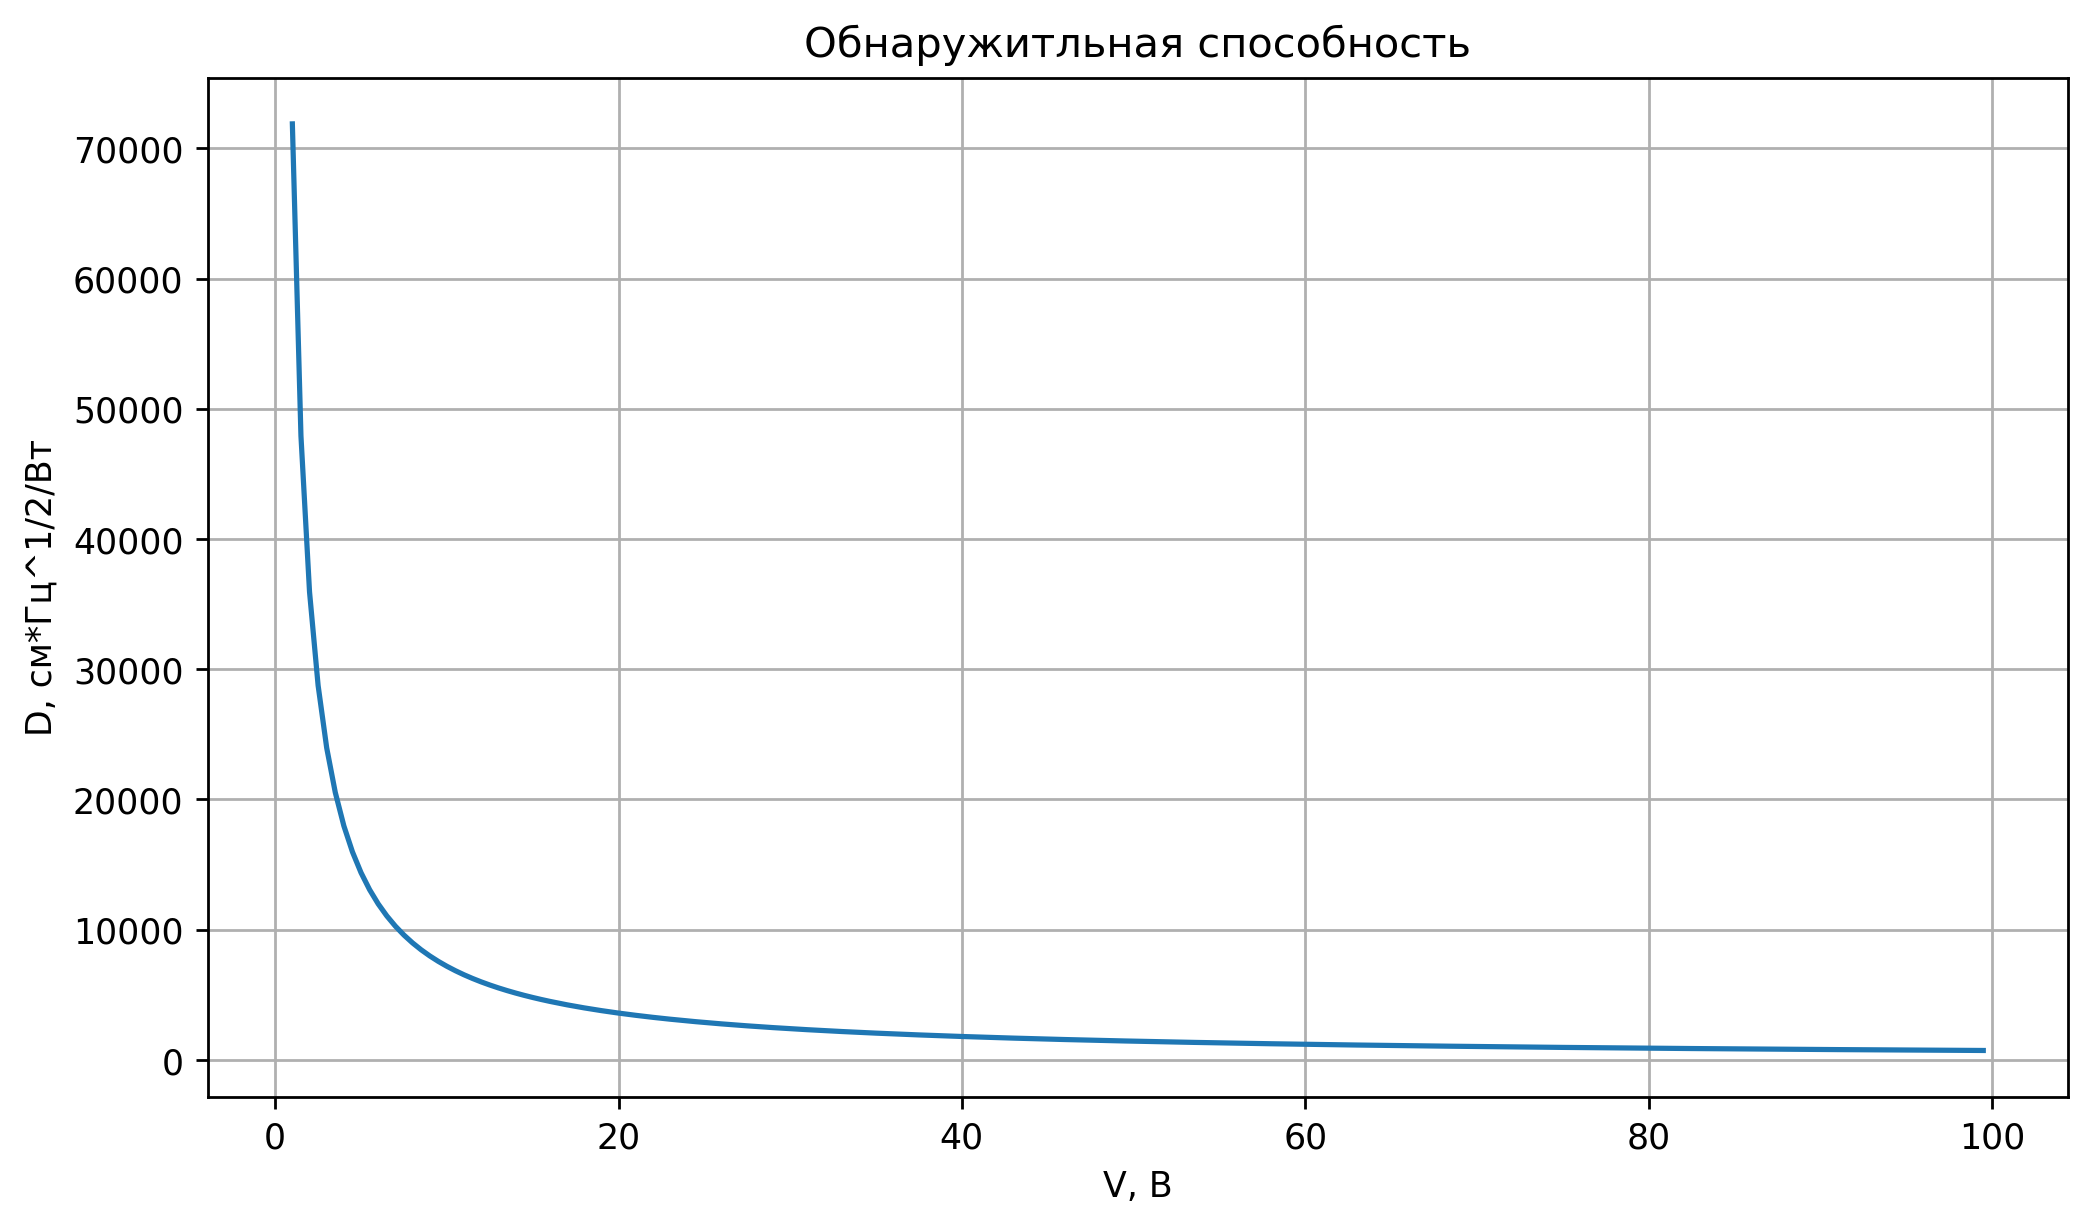

In [59]:
Vol=np.arange(1, 100, 0.5)
Iphs = np.zeros(len(Vol))
for i in range(0, len(Vol)):
    Iphs[i] = Vol[i]/(2*Rs0)

In = np.zeros(len(Vol))
for i in range(0, len(Vol)):
    In[i]=np.sqrt(1/155*(4*Iphs[i]**2*(un/up+1)**2*nn[14]*t)*1e12/((un/up*ni+ni)*2*(1+t**2+(2*np.pi*c/3.2e-6))))

D = np.zeros(len(Vol))
for i in range(0, len(Vol)):
    D[i]=(Sin*np.sqrt(1*176))/(In[i])
  
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("V, В") 
ax.set_ylabel("D, см*Гц^1/2/Вт") 
ax.set_title('Обнаружитльная способность')
ax.plot(Vol, D);
